# Configuração e preparação dos Dados


---



In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 94% 48.0M/50.9M [00:03<00:00, 24.1MB/s]
100% 50.9M/50.9M [00:03<00:00, 16.9MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  Flotation Column 07 Air Flow  \
0                       253.235  ...                       250.884   
1                       250.532  ...                       248.994   
2                       247.874  ...                       248.071   
3                       254.487  ...                       251.147   
4                       252.136  ...                       248.928   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                    457.396                    432.962   
1                    451.891                    429.560   
2                    451.240                    468.927   
3                    452.441                    458.165   
4                    452.441                    452.900   

   Flotation Column 03 Level  Flotation Column 04 Level  \
0                    424.954                    443.558   
1                    432.939                    448.086   
2                    434.610                    449.688   
3                    442.865                    446.210   
4                    450.523                    453.670   

   Flotation Column 05 Level  Flotation Column 06 Level  \
0                    502.255                    446.370   
1                    496.363                    445.922   
2                    484.411                    447.826   
3                    471.411                    437.690   
4                    462.598                    443.682   

   Flotation Column 07 Level  % Iron Concentrate  % Silica Concentrate  
0                    523.344               66.91                  1.31  
1                    498.075               66.91                  1.31  
2                    458.567               66.91                  1.31  
3                    427.669               66.91                  1.31  
4                    425.679               66.91                  1.31  

[5 rows x 24 columns]

In [7]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [8]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df_resampled = df.resample('H').last().round(2)
df_resampled['% Silica Concentrate delay'] = df_resampled['% Silica Concentrate'].shift(freq= '-2h')
df_resampled['% Iron Concentrate delay'] = df_resampled['% Iron Concentrate'].shift(freq= '-2h')
df_resampled


% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53      557.43   
2017-03-10 02:00:00        55.20          16.98      3170.41      539.67   
2017-03-10 03:00:00        55.20          16.98      3365.65      573.52   
2017-03-10 04:00:00        55.20          16.98      2693.75      592.13   
2017-03-10 05:00:00        55.20          16.98      2352.22      601.81   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20      2888.06      494.99   
2017-09-09 20:00:00        49.75          23.20      4218.57      492.03   
2017-09-09 21:00:00        49.75          23.20      3159.10      520.99   
2017-09-09 22:00:00        49.75          23.20      3348.19      511.96   
2017-09-09 23:00:00        49.75          23.20      2983.08      461.28   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00         395.71        10.07              1.74   
2017-03-10 02:00:00         399.70        10.16              1.67   
2017-03-10 03:00:00         399.02        10.09              1.71   
2017-03-10 04:00:00         409.20         9.95              1.72   
2017-03-10 05:00:00         398.14         9.84              1.76   
...                            ...          ...               ...   
2017-09-09 19:00:00         376.47         9.28              1.67   
2017-09-09 20:00:00         378.63         9.16              1.65   
2017-09-09 21:00:00         381.47         9.58              1.74   
2017-09-09 22:00:00         379.68         9.89              1.74   
2017-09-09 23:00:00         378.69         9.68              1.69   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                        249.21   
2017-03-10 02:00:00                        249.29   
2017-03-10 03:00:00                        249.38   
2017-03-10 04:00:00                        248.30   
2017-03-10 05:00:00                        248.95   
...                                           ...   
2017-09-09 19:00:00                        317.06   
2017-09-09 20:00:00                        302.08   
2017-09-09 21:00:00                        296.06   
2017-09-09 22:00:00                        301.65   
2017-09-09 23:00:00                        301.38   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                        253.24   
2017-03-10 02:00:00                        248.27   
2017-03-10 03:00:00                        253.31   
2017-03-10 04:00:00                        251.91   
2017-03-10 05:00:00                        246.31   
...                                           ...   
2017-09-09 19:00:00                        297.75   
2017-09-09 20:00:00                        301.35   
2017-09-09 21:00:00                        298.48   
2017-09-09 22:00:00                        298.36   
2017-09-09 23:00:00                        298.83   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                        250.58  ...   
2017-03-10 02:00:00                        248.31  ...   
2017-03-10 03:00:00                        252.09  ...   
2017-03-10 04:00:00                        251.12  ...   
2017-03-10 05:00:00                        248.07  ...   
...                                           ...  ...   
2017-09-09 19:00:00                        301.68  ...   
2017-09-09 20:00:00                        300.54  ...   
2017-09-09 21:00:00                        299.08  ...   
2017-09-09 22:00:00                        298.23  ...   
2017-09-09 23:00:00                        297.99  ...   


In [9]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2017-03-10 01:00:00 to 2017-09-09 21:00:00
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3490 non-null   float64
 1   % Silica Feed                 3490 non-null   float64
 2   Starch Flow                   3490 non-null   float64
 3   Amina Flow                    3490 non-null   float64
 4   Ore Pulp Flow                 3490 non-null   float64
 5   Ore Pulp pH                   3490 non-null   float64
 6   Ore Pulp Density              3490 non-null   float64
 7   Flotation Column 01 Air Flow  3490 non-null   float64
 8   Flotation Column 02 Air Flow  3490 non-null   float64
 9   Flotation Column 03 Air Flow  3490 non-null   float64
 10  Flotation Column 04 Air Flow  3490 non-null   float64
 11  Flotation Column 05 Air Flow  3490 non-null   float64
 12  Flotation Column 06 Air Fl

In [10]:
df_resampled['Air Flow Mean'] = df_resampled[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']].mean(axis=1)
df_resampled['Level Mean'] = df_resampled[['Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level']].mean(axis=1)


In [11]:
features = [
    'Amina Flow',
    'Ore Pulp pH',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
    '% Iron Concentrate delay',
]

features_agg = [
    'Amina Flow',
    'Ore Pulp pH',
    'Air Flow Mean',
    'Level Mean',
    '% Iron Concentrate delay',
]

target = ['% Silica Concentrate delay']

# Modelos utilizando todas as features e normalizadas por Min-Max

---

In [12]:
x=df_resampled[features]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [13]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 10) (2233, 1)
(559, 10) (559, 1)
(698, 10) (698, 1)


In [14]:
#Criando DF para resultado
result_minmax_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

## Linear

MAE =  0.4989903207829747
MSE =  0.40686989684275904
R2 =  0.6592485389076956


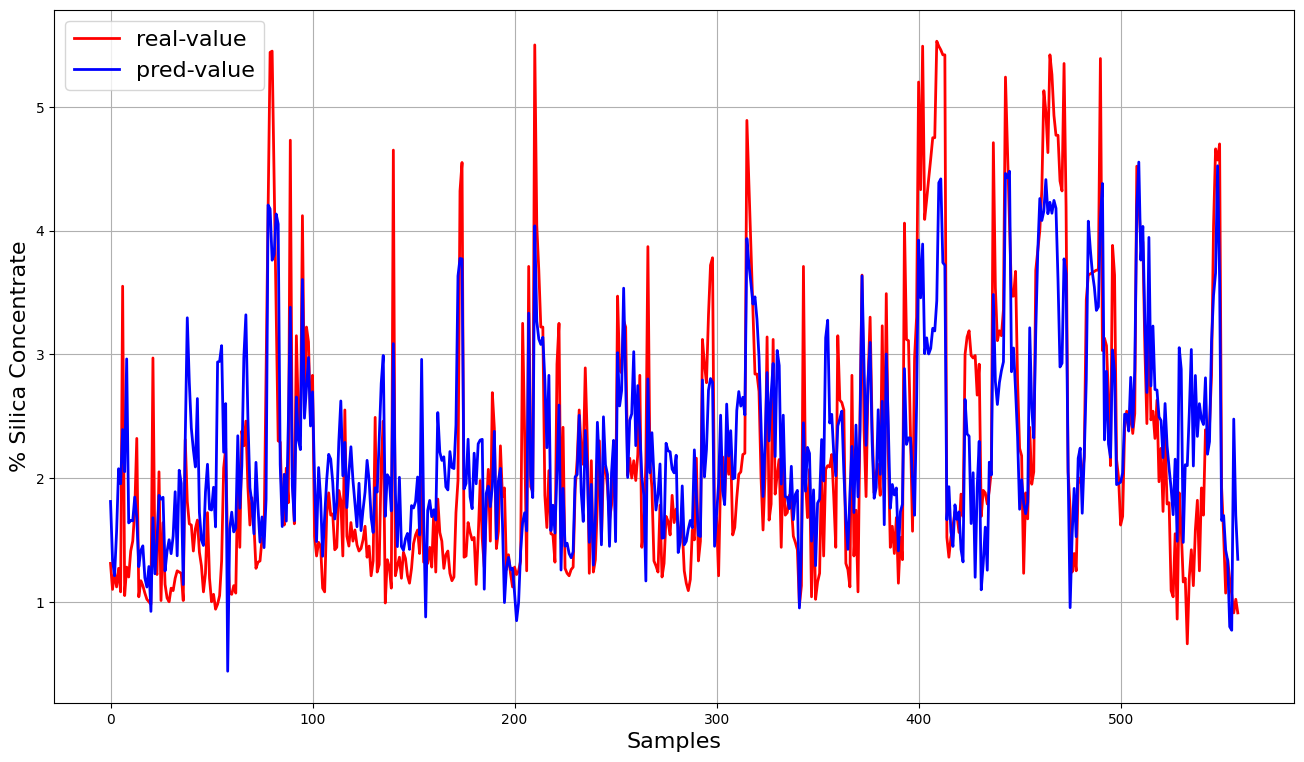

In [15]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_full.loc[len(result_minmax_full)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Polinomial

MAE =  0.6131272323020209
MSE =  0.6510663546727621
R2 =  0.4547352523636762


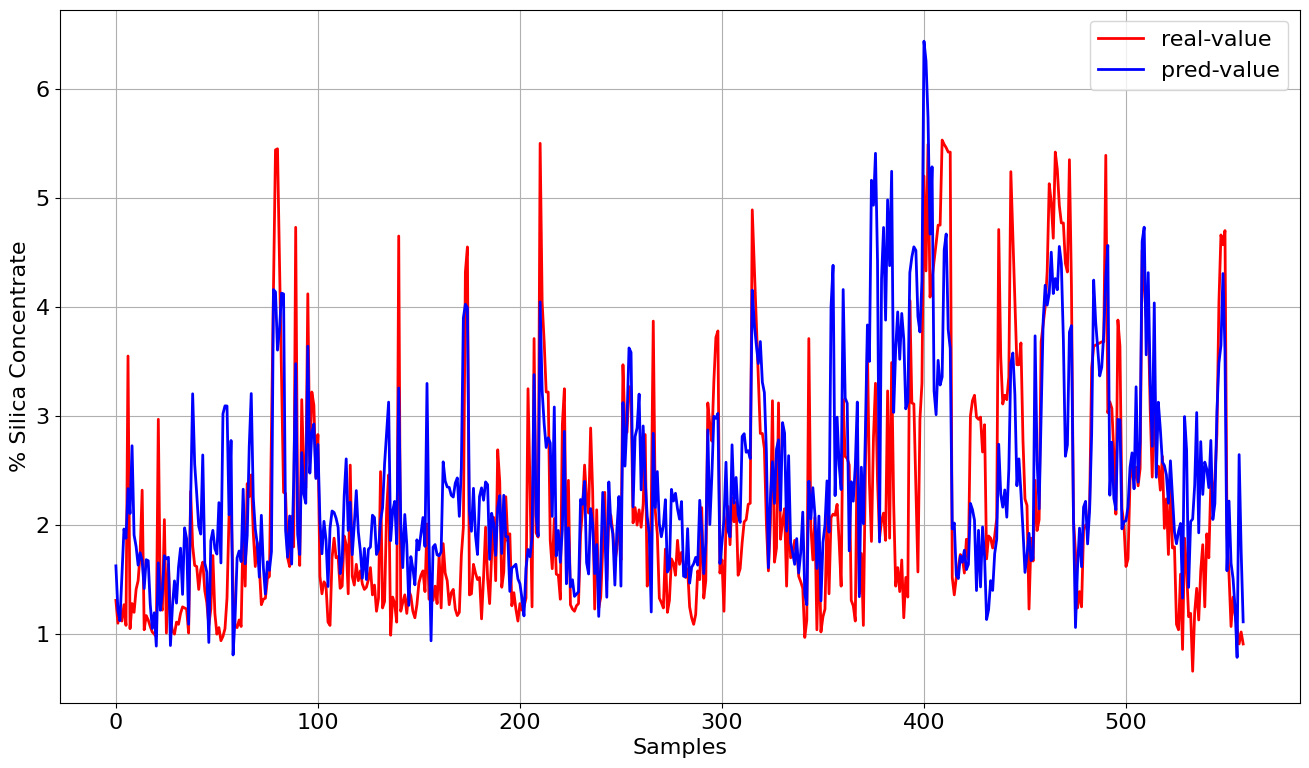

In [16]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR Linear

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.492933440440293
MSE =  0.4079364932624277
R2 =  0.6583552698523583


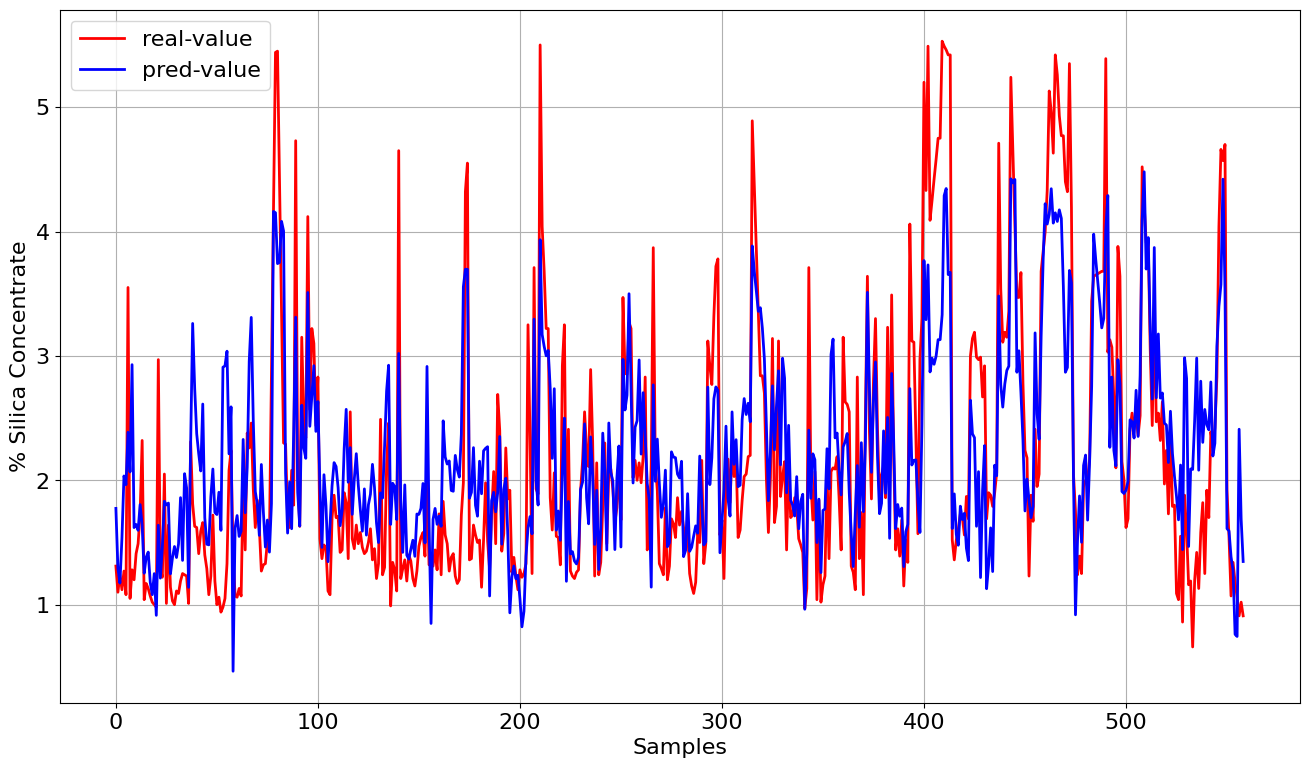

In [17]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.4936642000893305
MSE =  0.43631780886325183
R2 =  0.6345860629541638


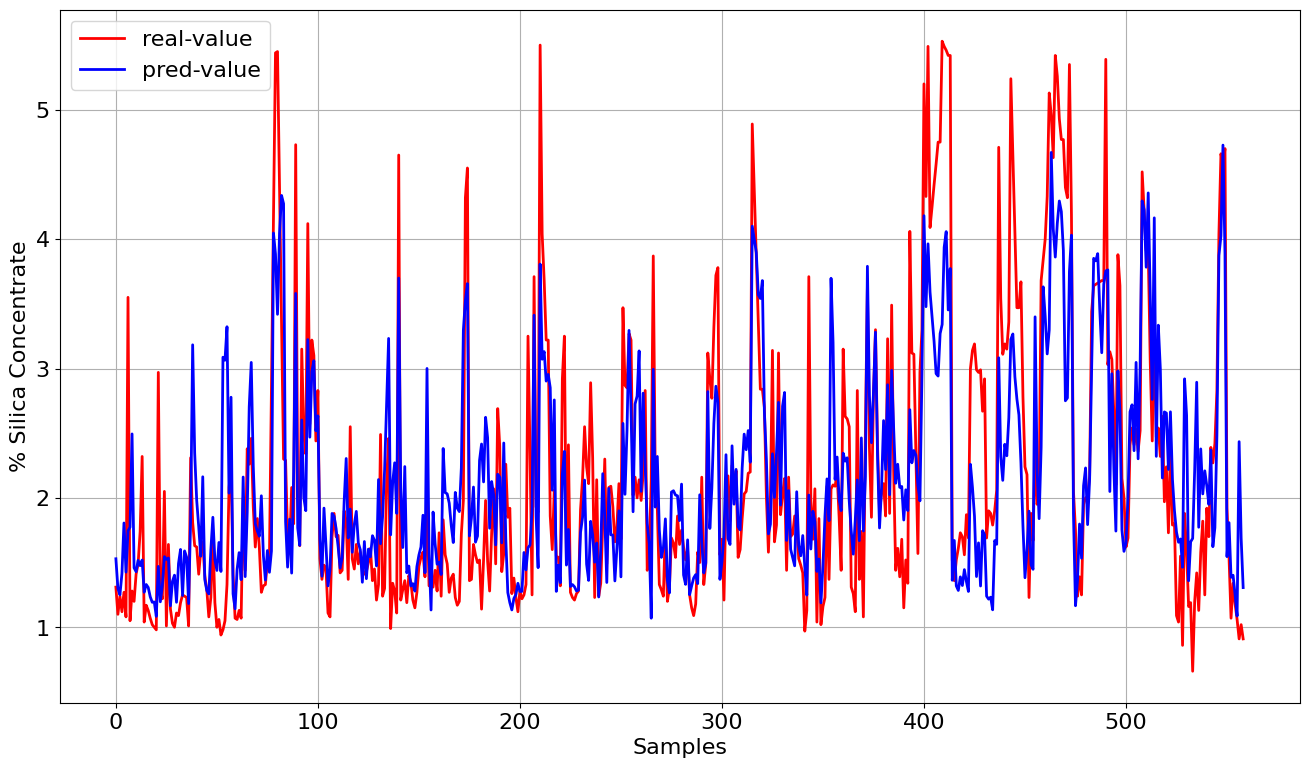

In [18]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.49018910978381686
MSE =  0.4025520321148484
R2 =  0.6628647285699234


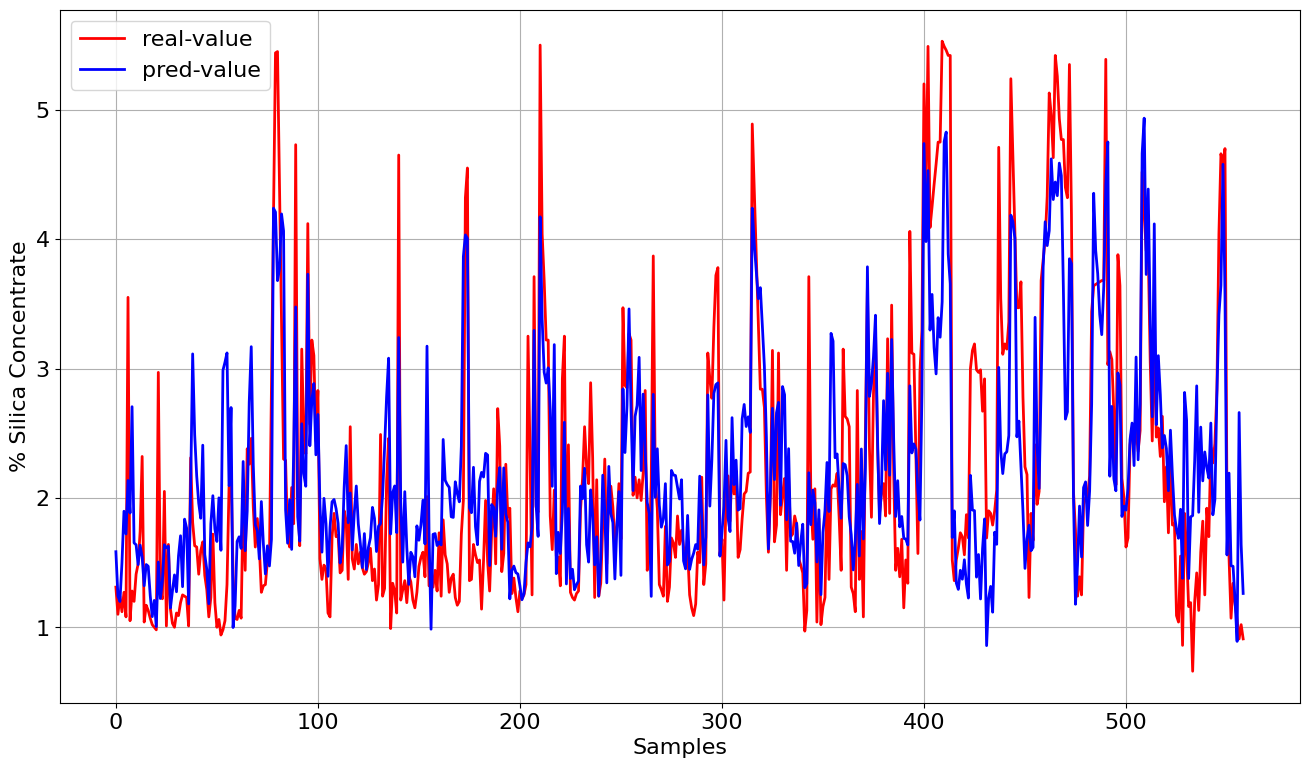

In [19]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.4915603220035778
MSE =  0.42031185614955346
R2 =  0.6479909666240827


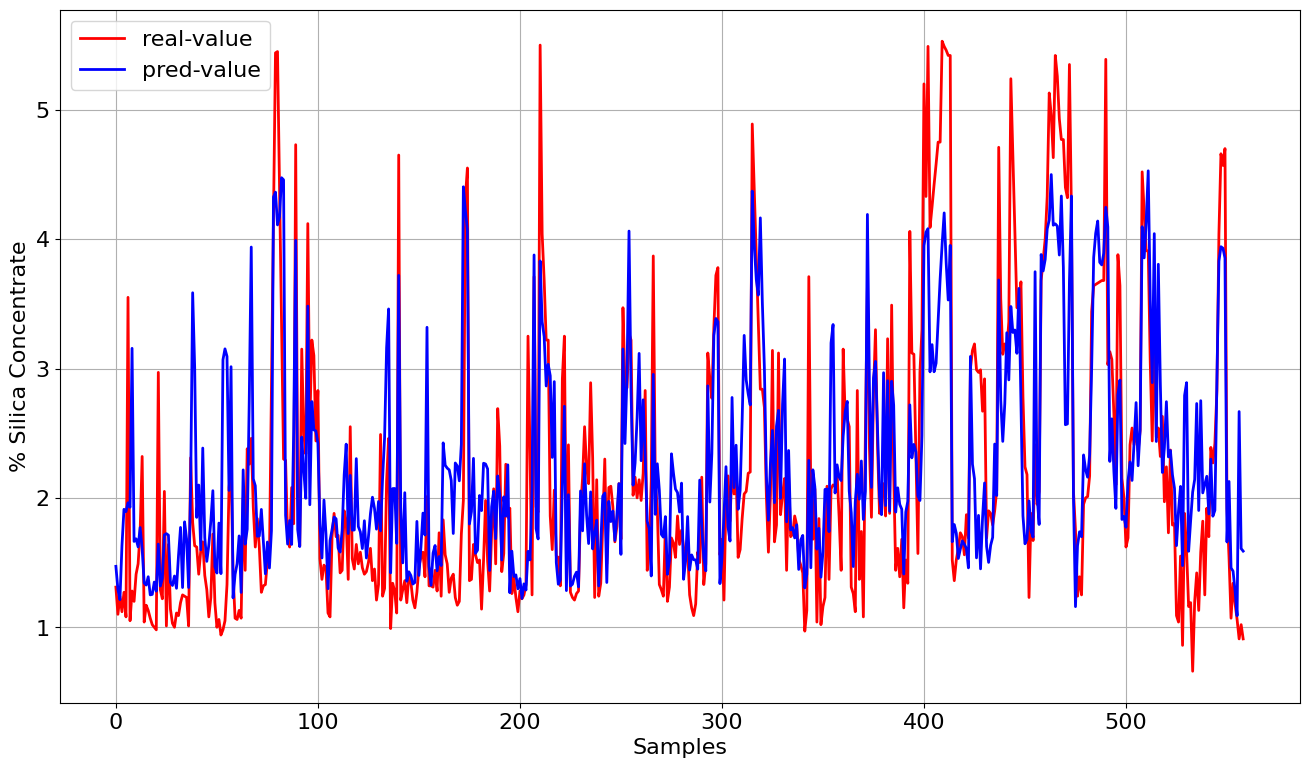

In [20]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.45703453272601136
MSE =  0.3657228837197807
R2 =  0.6937089522979192


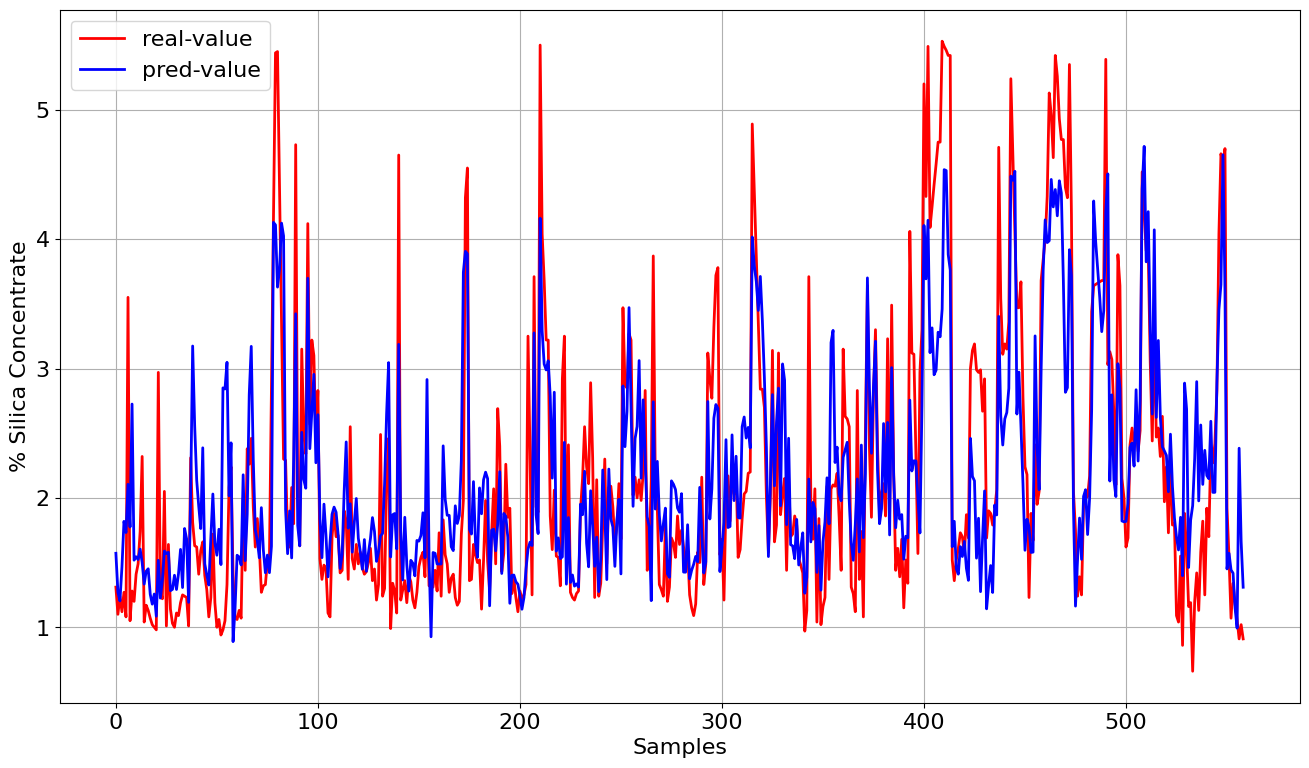

In [21]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

# Modelos utilizando todas as features e normalizadas por z-norm

---

In [22]:
x=df_resampled[features]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [23]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 10) (2233, 1)
(559, 10) (559, 1)
(698, 10) (698, 1)


In [24]:
#Criando DF para resultado
result_znorm_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

## Linear

MAE =  0.4989903207829742
MSE =  0.40686989684275854
R2 =  0.6592485389076961


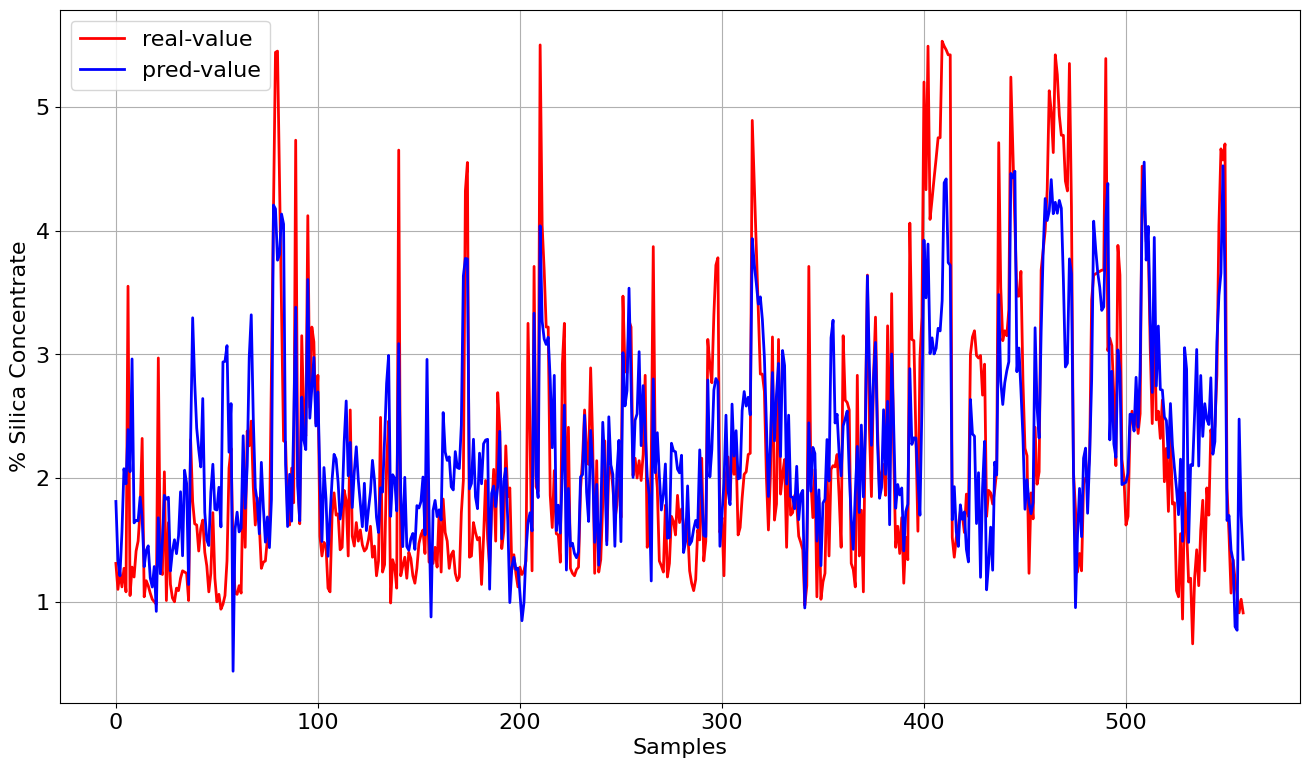

In [25]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_full.loc[len(result_znorm_full)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelo Polinomial

MAE =  0.6131272323020123
MSE =  0.6510663546727498
R2 =  0.4547352523636865


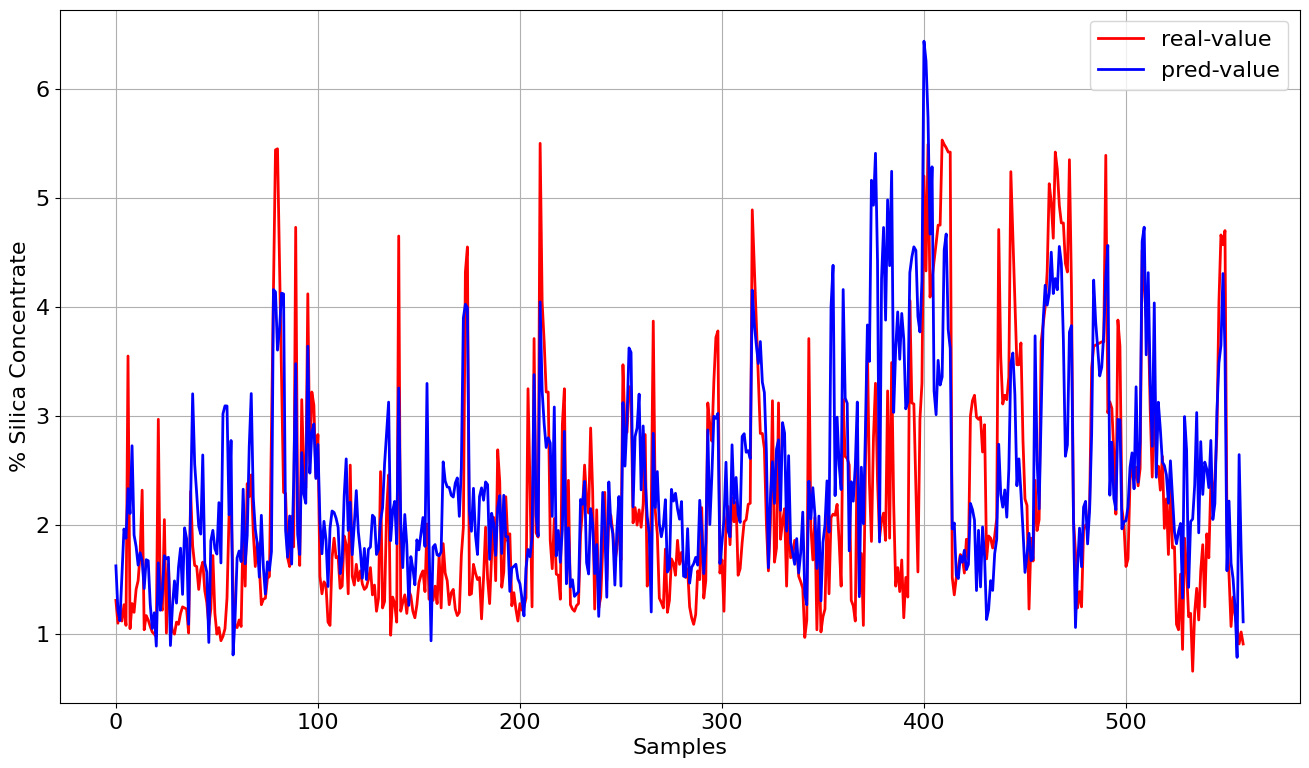

In [26]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR Linear

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.5003917605083019
MSE =  0.42673069217013493
R2 =  0.6426152242319875


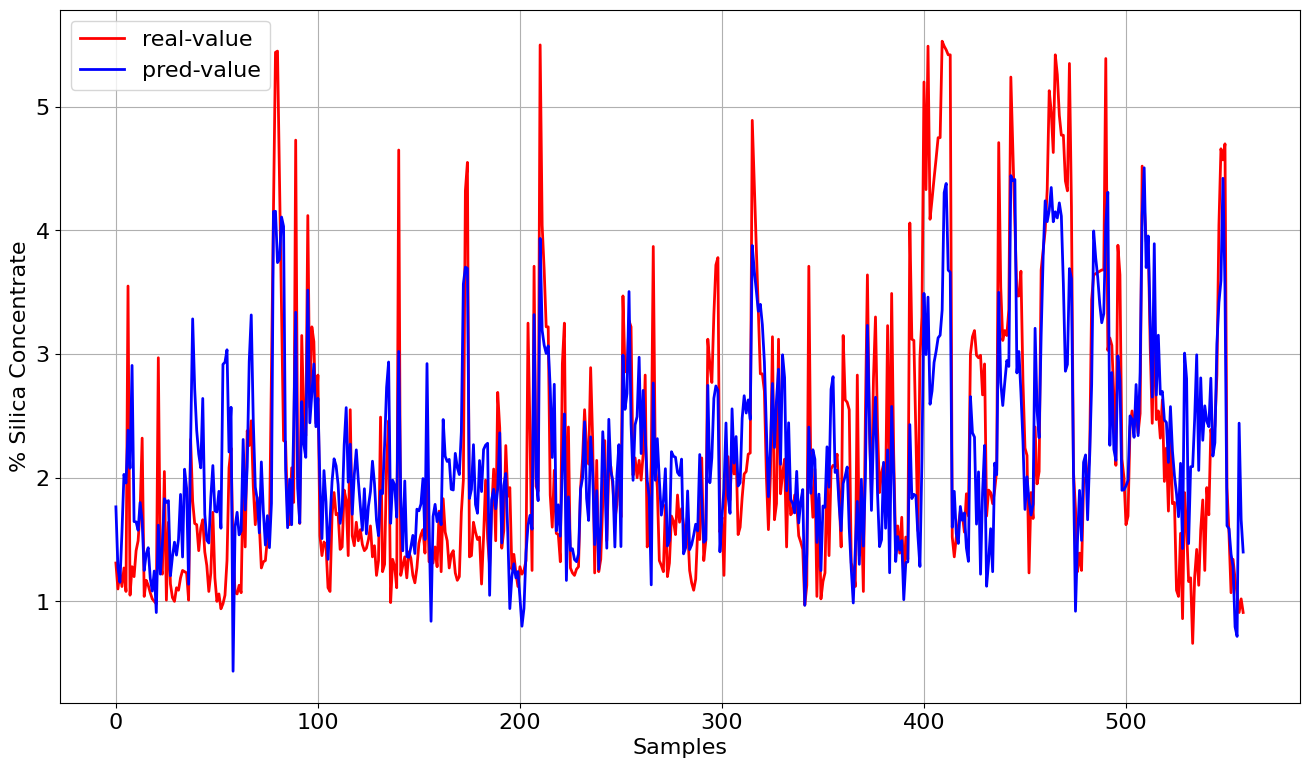

In [27]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.5016807306294229
MSE =  0.455688902419022
R2 =  0.618362871011715


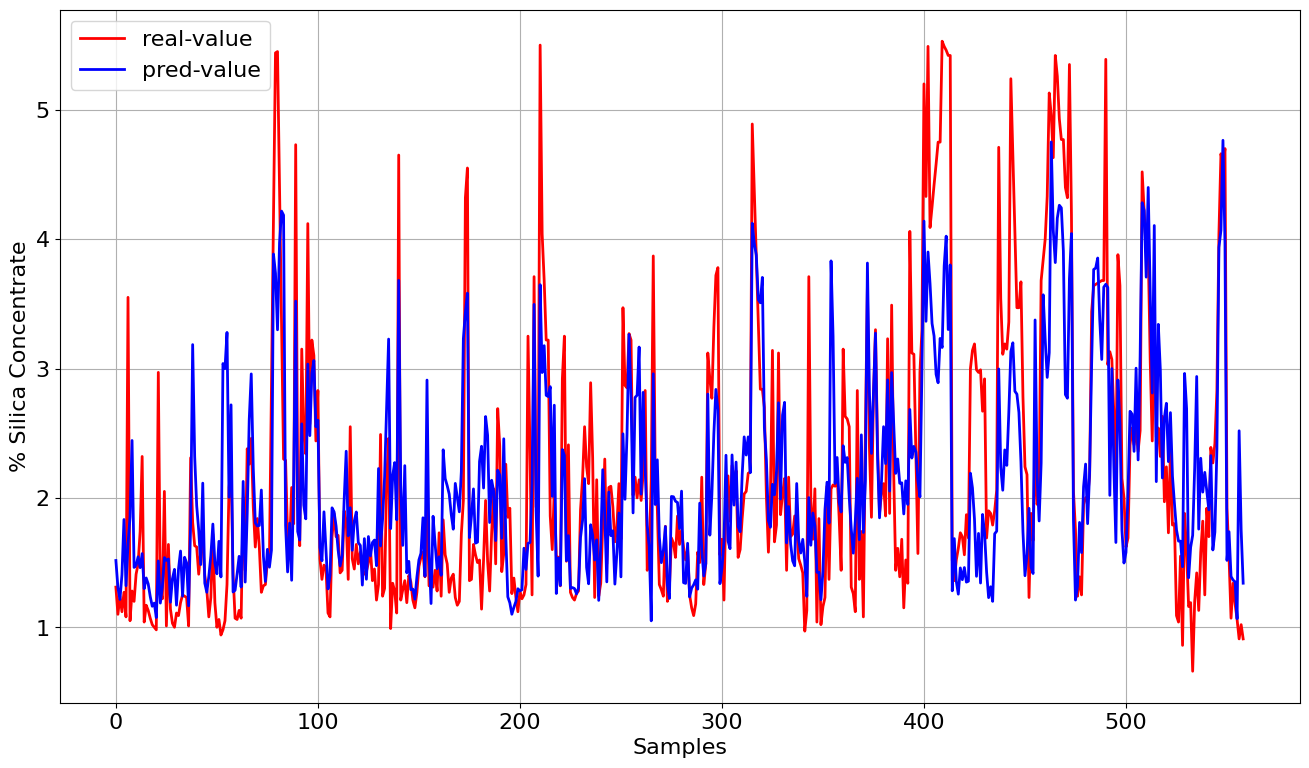

In [28]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.6345500066998258
MSE =  0.7985884153871542
R2 =  0.3311862797759999


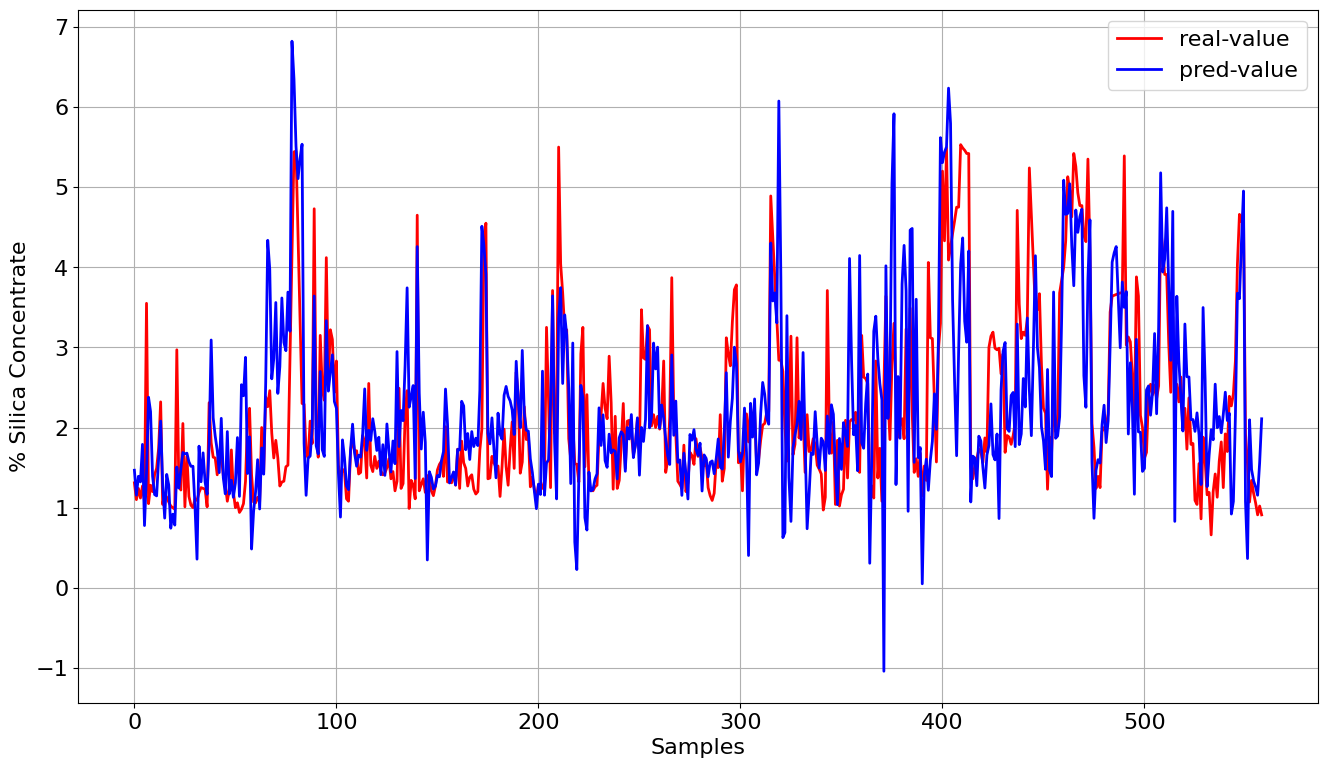

In [29]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.49162296958855095
MSE =  0.4205320349001796
R2 =  0.6478065680446854


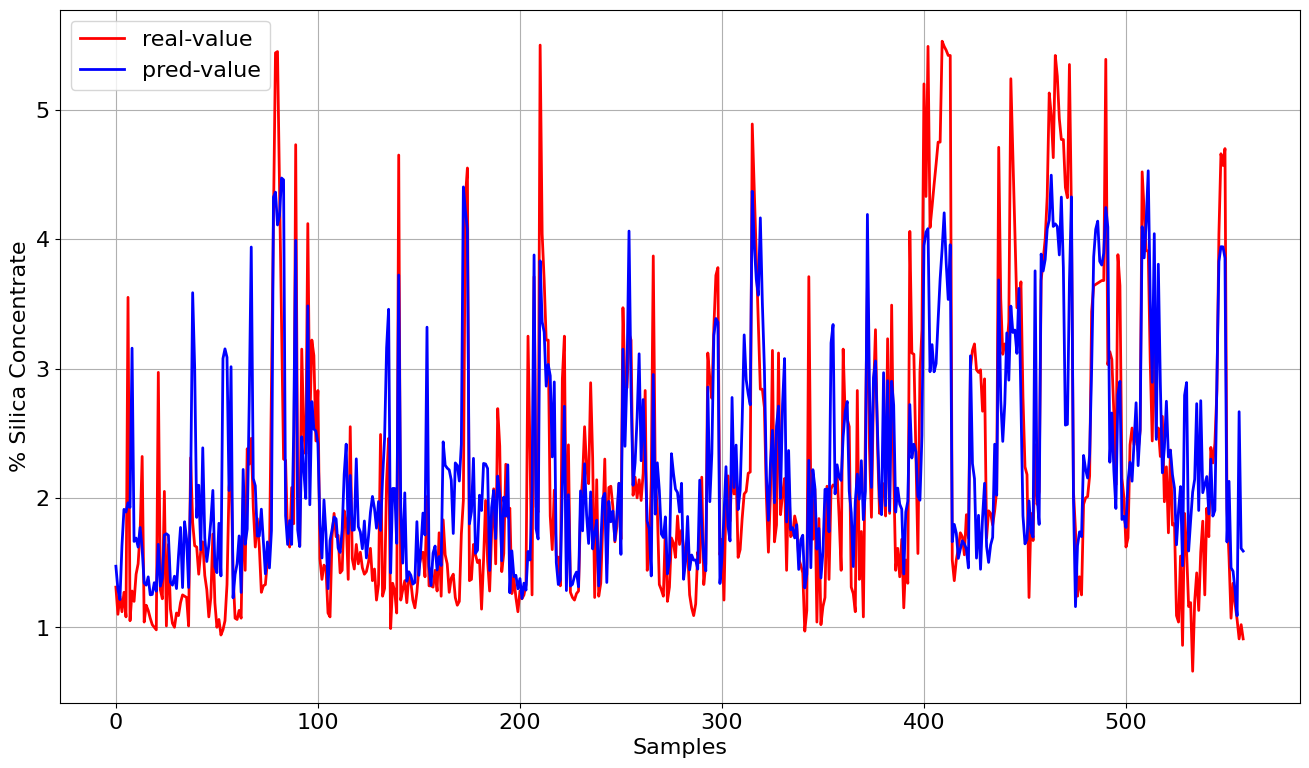

In [30]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.5098307915405849
MSE =  0.45098431467583155
R2 =  0.6223029392245978


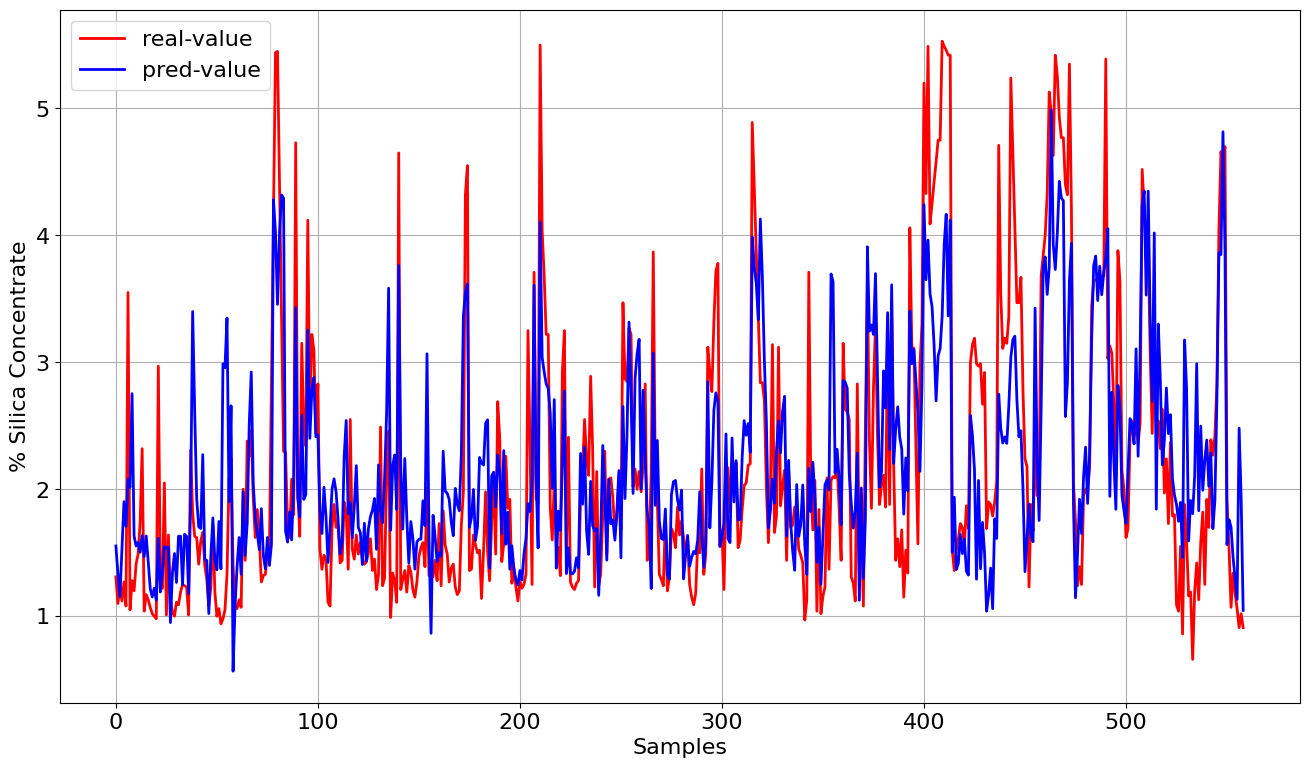

In [31]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

# Modelos utilizando as features agregadas e normalizadas por Min-Max

---

In [32]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [33]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 5) (2233, 1)
(559, 5) (559, 1)
(698, 5) (698, 1)


In [34]:
#Criando DF para resultado
result_minmax_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

## Linear

MAE =  0.4855106447893731
MSE =  0.3947934336257933
R2 =  0.6693625151884204


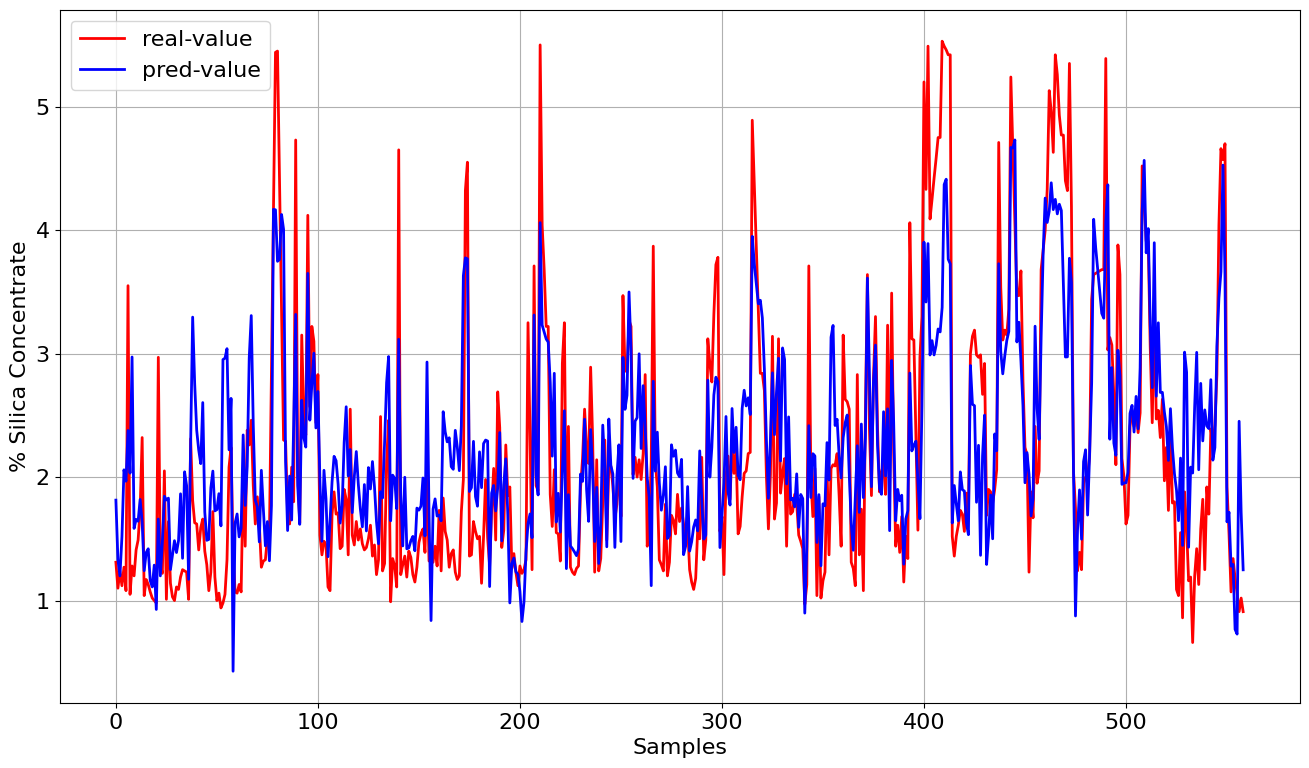

In [35]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelo Polinomial

MAE =  0.4949185123914434
MSE =  0.40209828080893006
R2 =  0.663244742971736


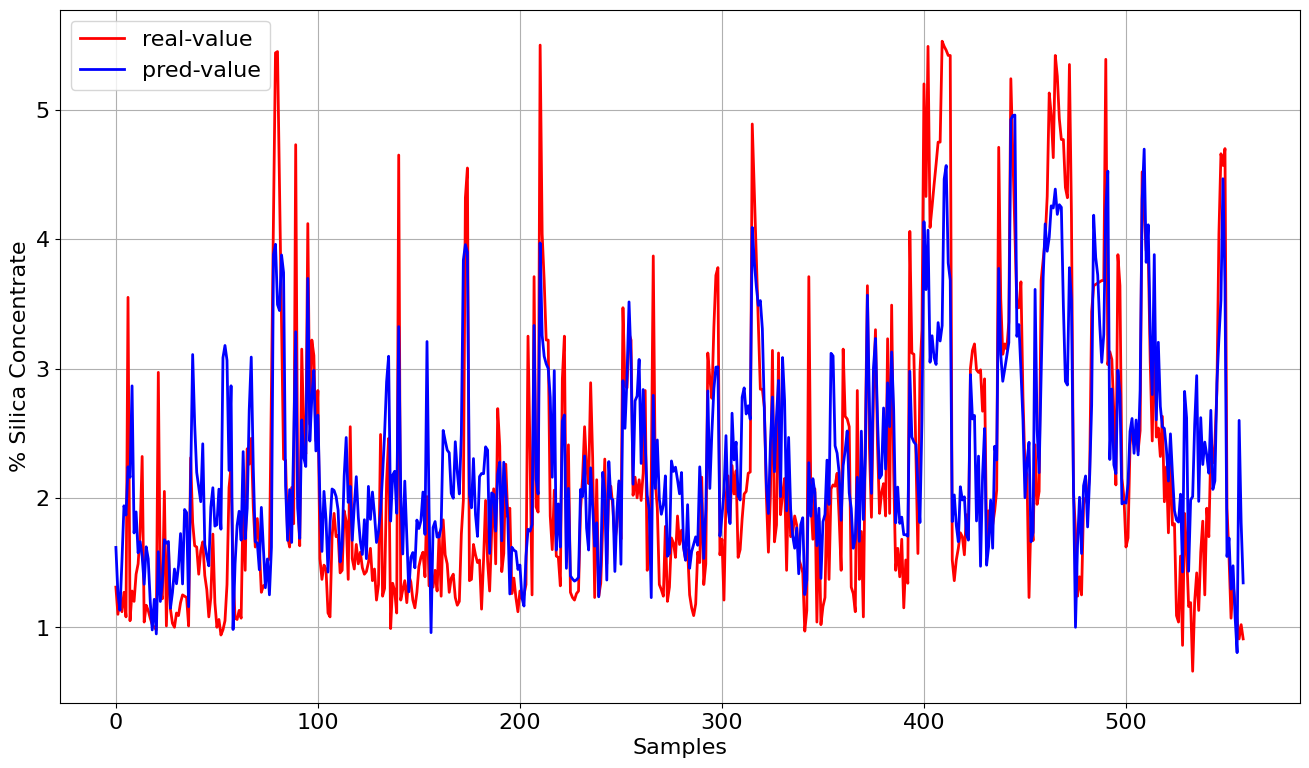

In [36]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR Linear

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.48158317147832524
MSE =  0.3950152944956867
R2 =  0.6691767078427258


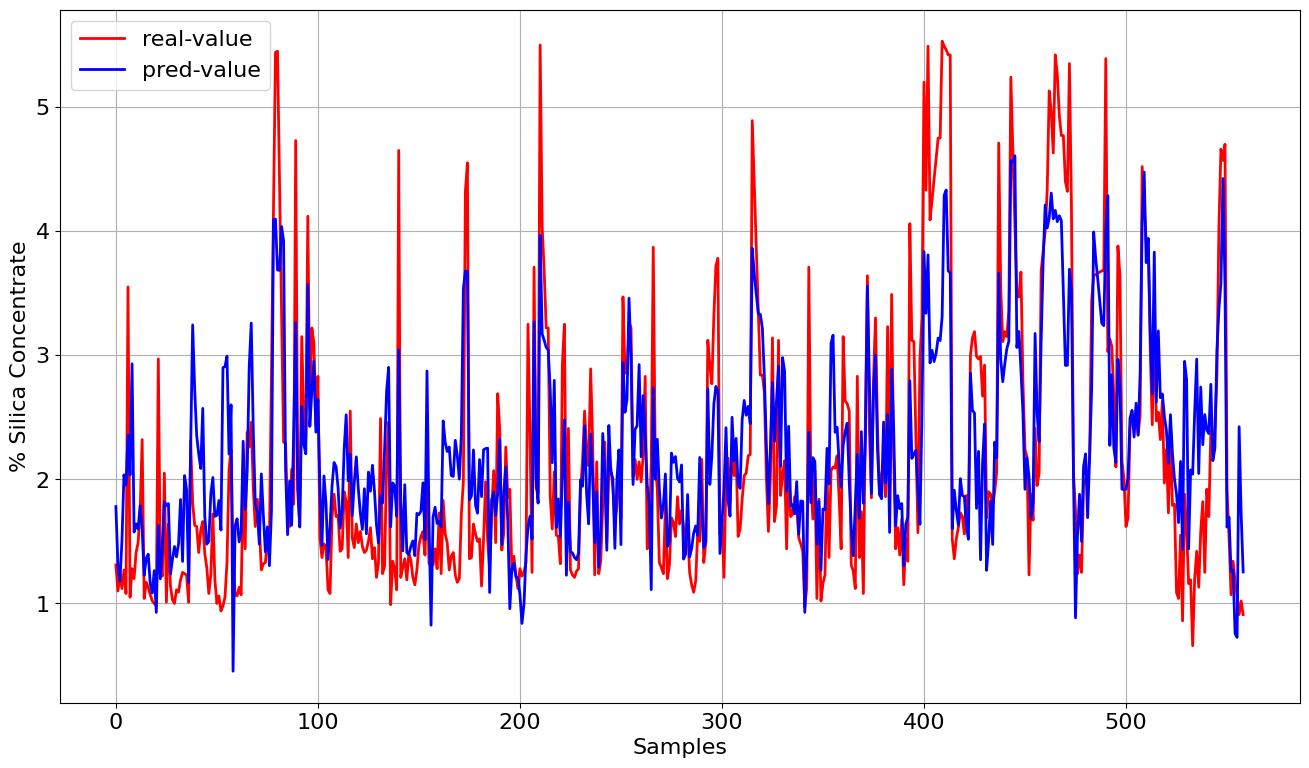

In [37]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.471242548692646
MSE =  0.40664447582314933
R2 =  0.6594373278605992


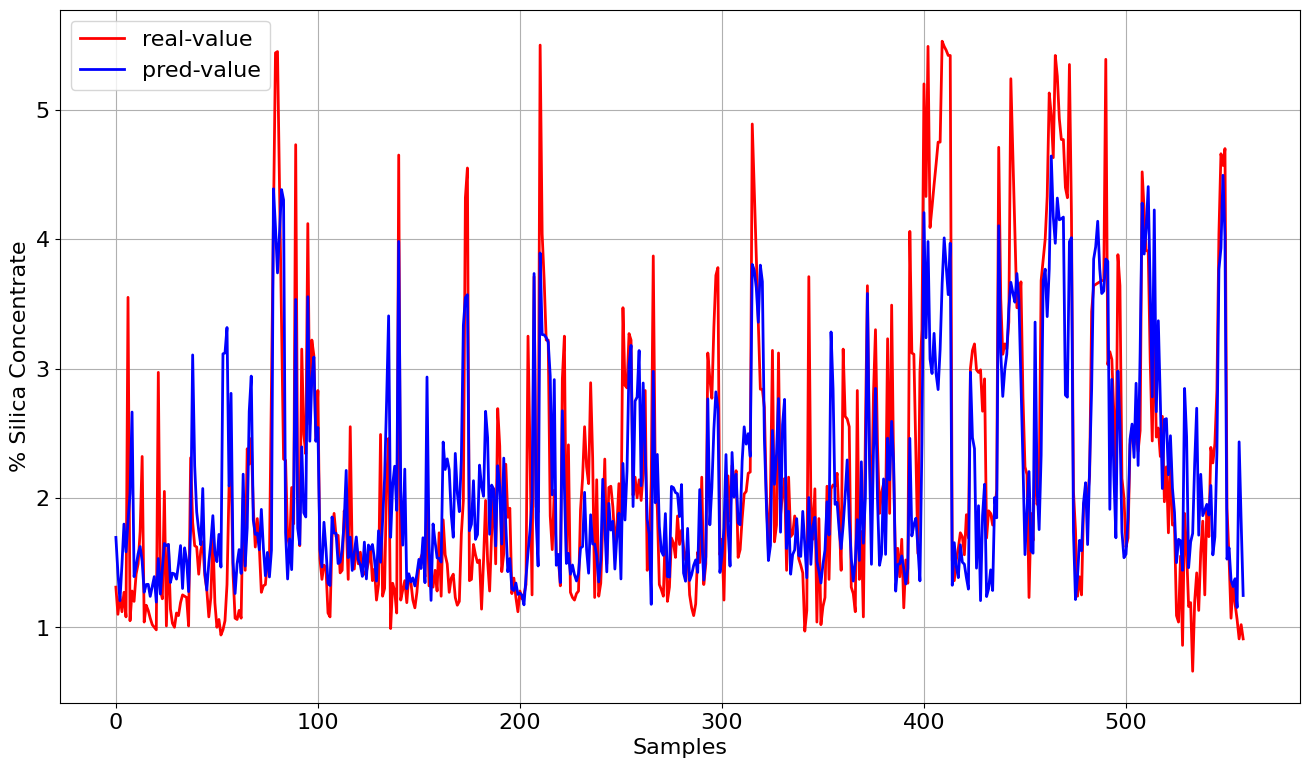

In [38]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.45541702279925406
MSE =  0.36025369425686676
R2 =  0.6982893705469468


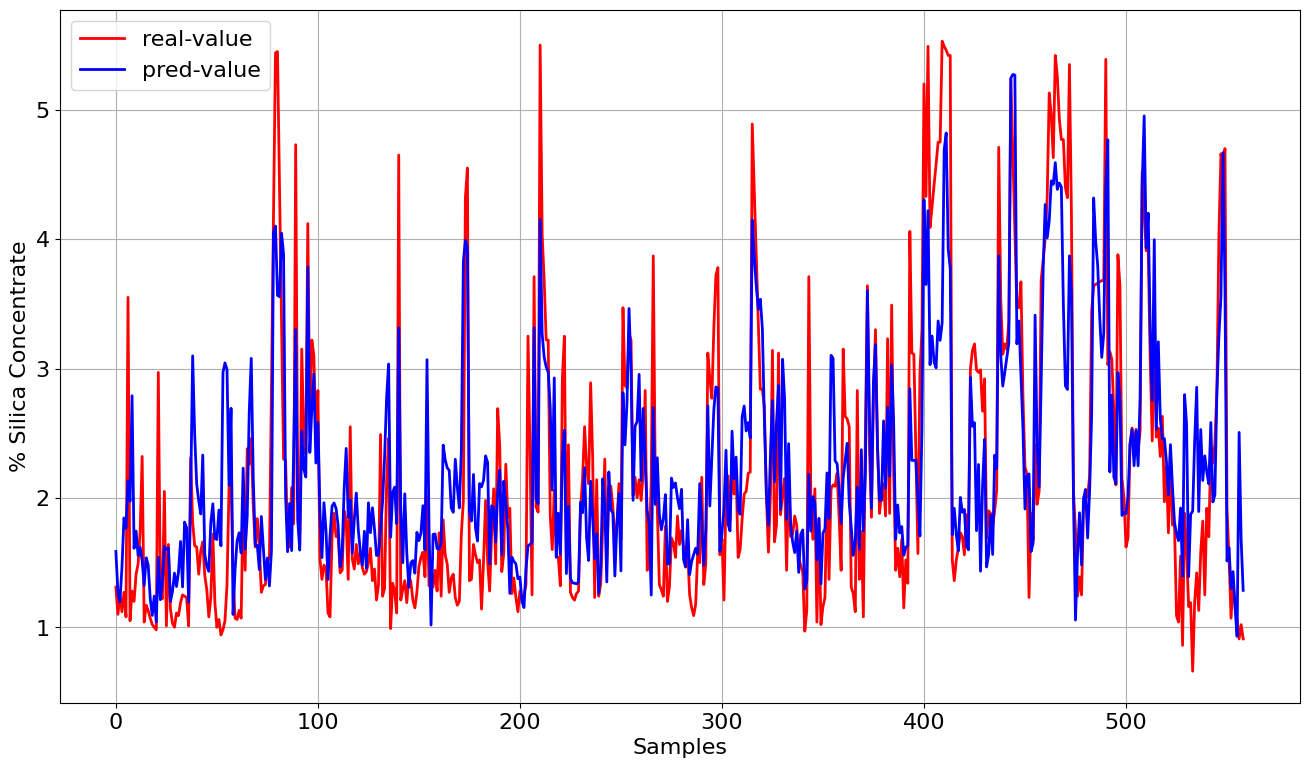

In [39]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.5019498211091237
MSE =  0.4478399331991059
R2 =  0.624936342655867


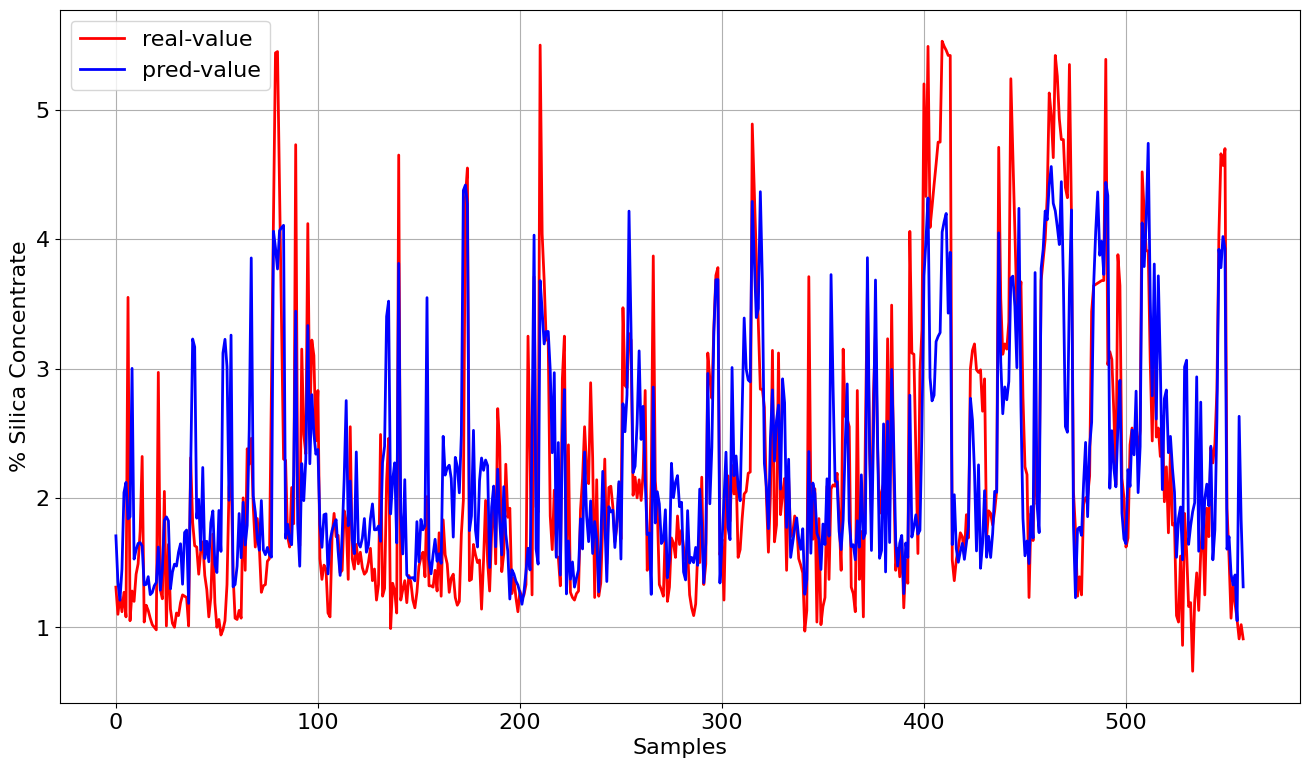

In [40]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.4782143090699535
MSE =  0.38128139990078364
R2 =  0.6806787744394824


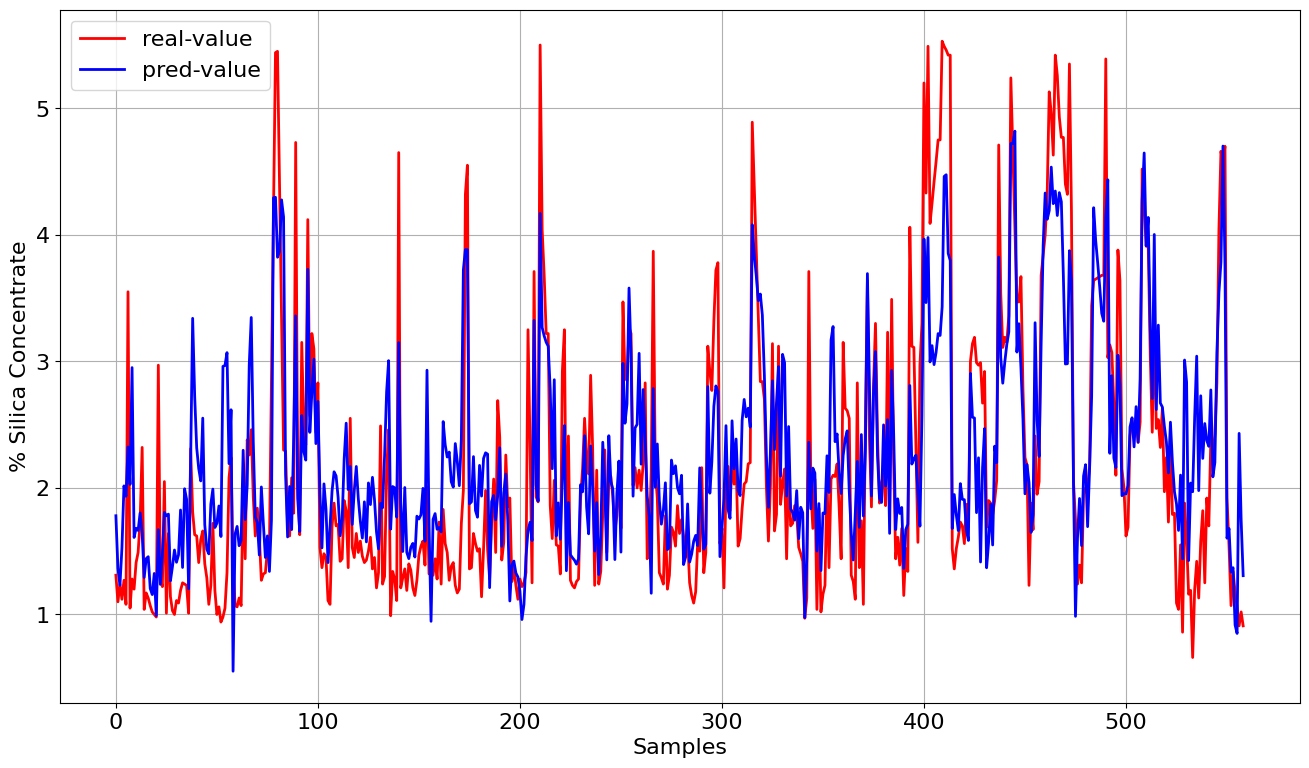

In [41]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

# Modelos utilizando as features agregadas e normalizadas por z-norm

---

In [42]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [43]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 5) (2233, 1)
(559, 5) (559, 1)
(698, 5) (698, 1)


In [44]:
#Criando DF para resultado
result_znorm_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

## Linear

MAE =  0.4855106447893734
MSE =  0.3947934336257936
R2 =  0.66936251518842


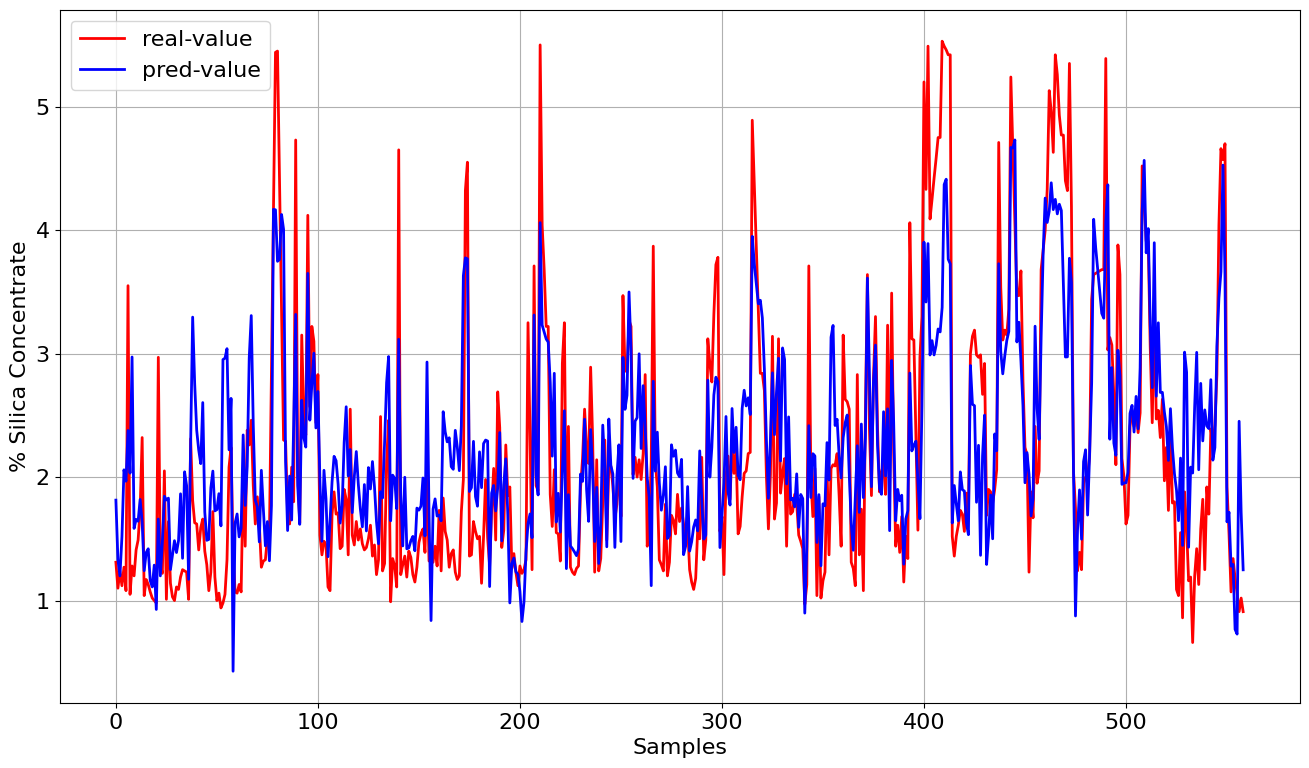

In [45]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_agg.loc[len(result_znorm_agg)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Modelo Polinomial

MAE =  0.4949185123914434
MSE =  0.40209828080893
R2 =  0.6632447429717361


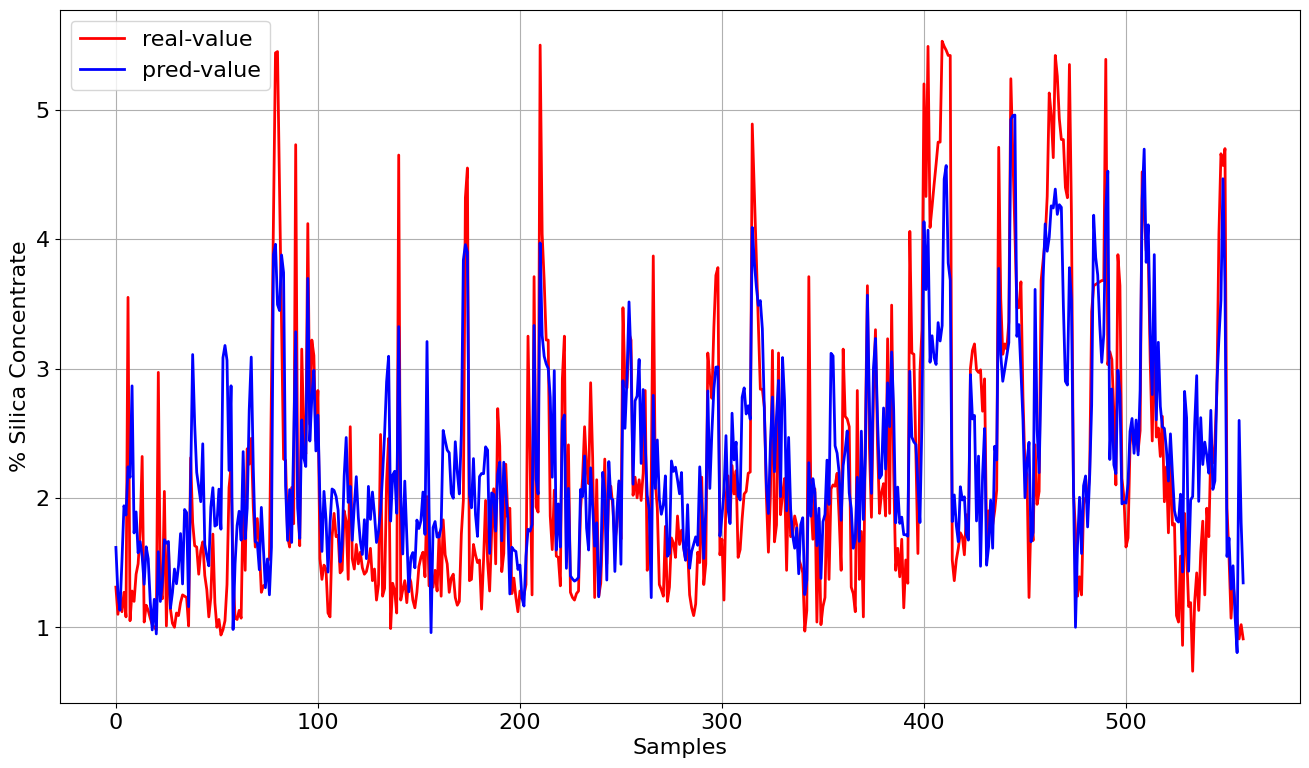

In [46]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR Linear

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.4809046756228466
MSE =  0.3935102331840037
R2 =  0.6704371890062847


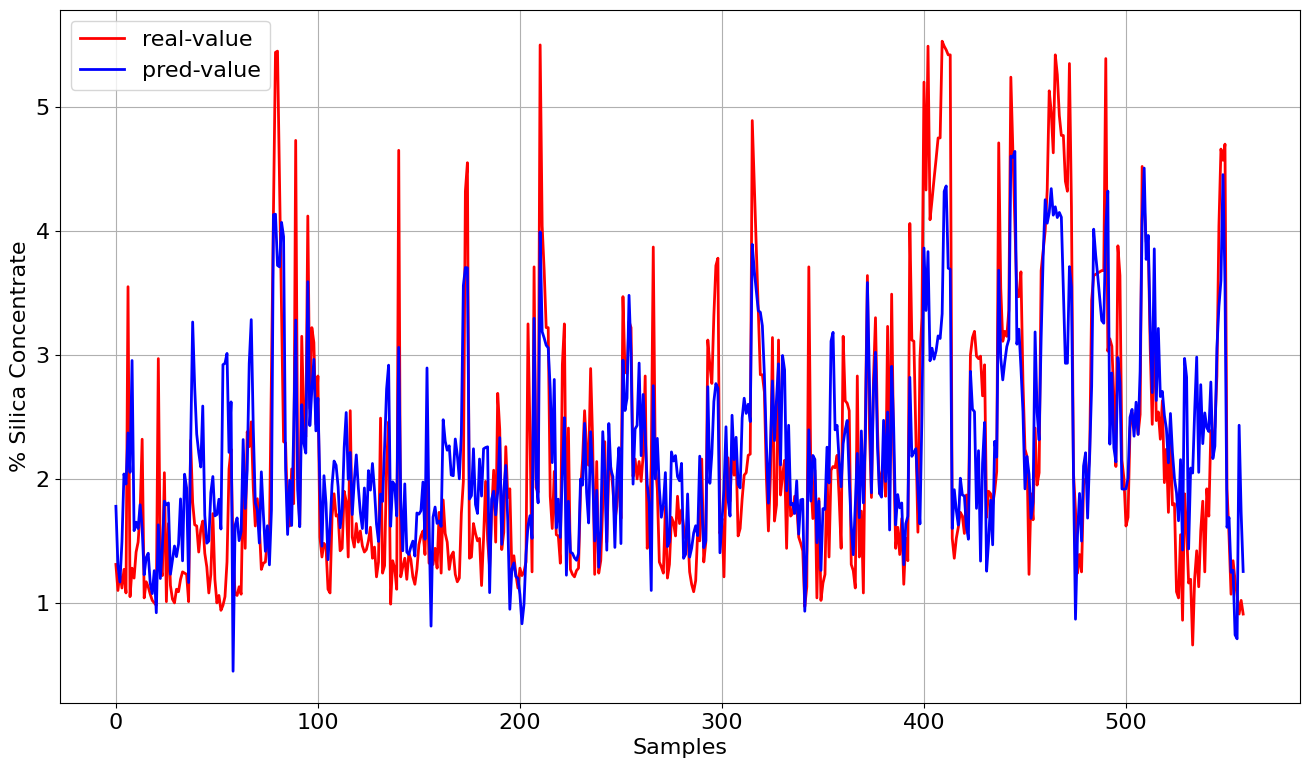

In [47]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.4824714904783222
MSE =  0.42703522947534484
R2 =  0.6423601757938684


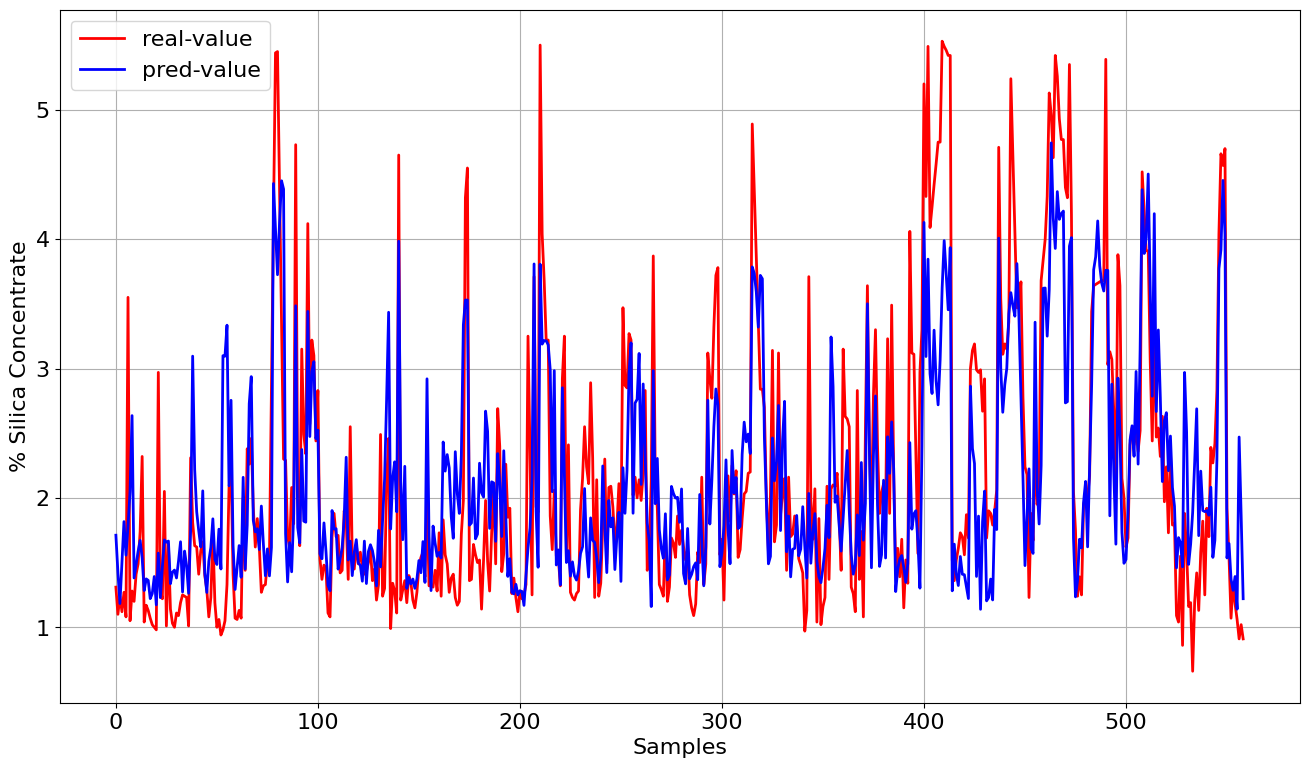

In [48]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Support Vector Machine - SVR rbf2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.5380899947336609
MSE =  0.5348603199421492
R2 =  0.5520572130923226


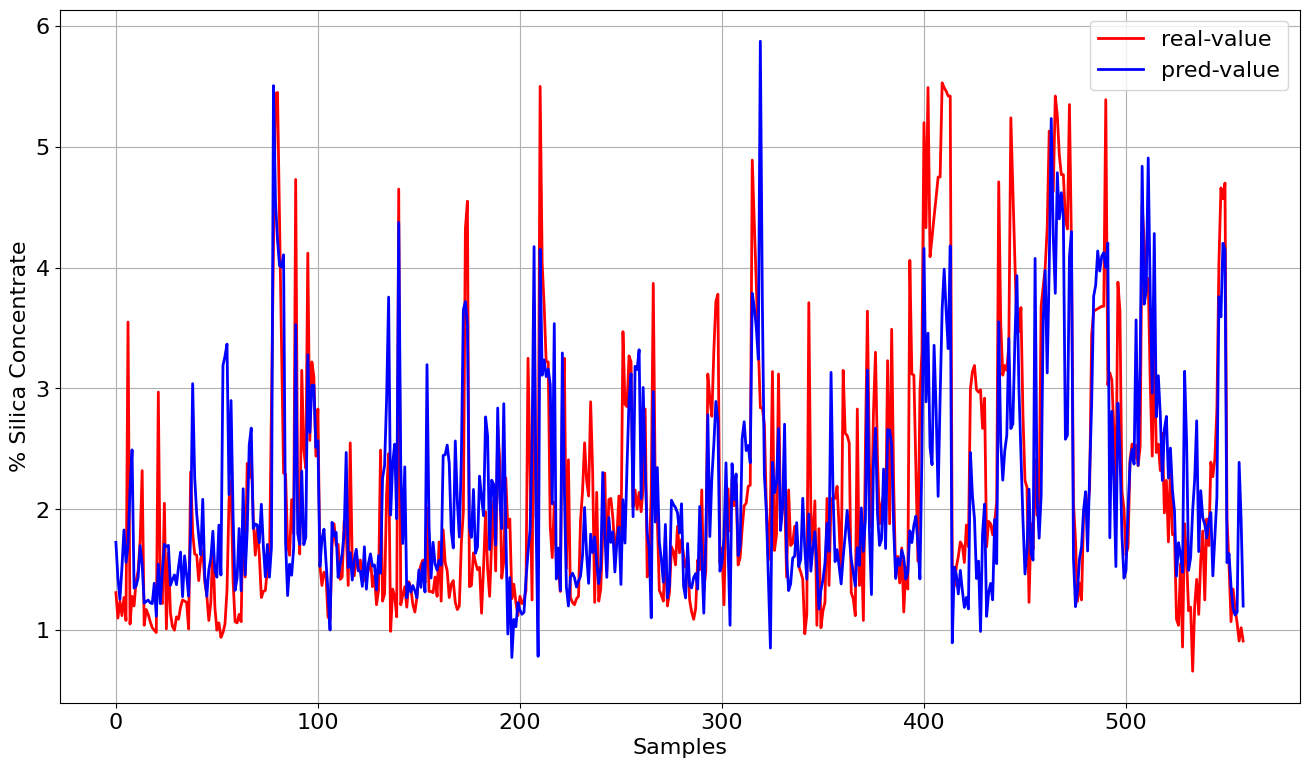

In [49]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.5020646153846157
MSE =  0.4480640484475853
R2 =  0.6247486472796178


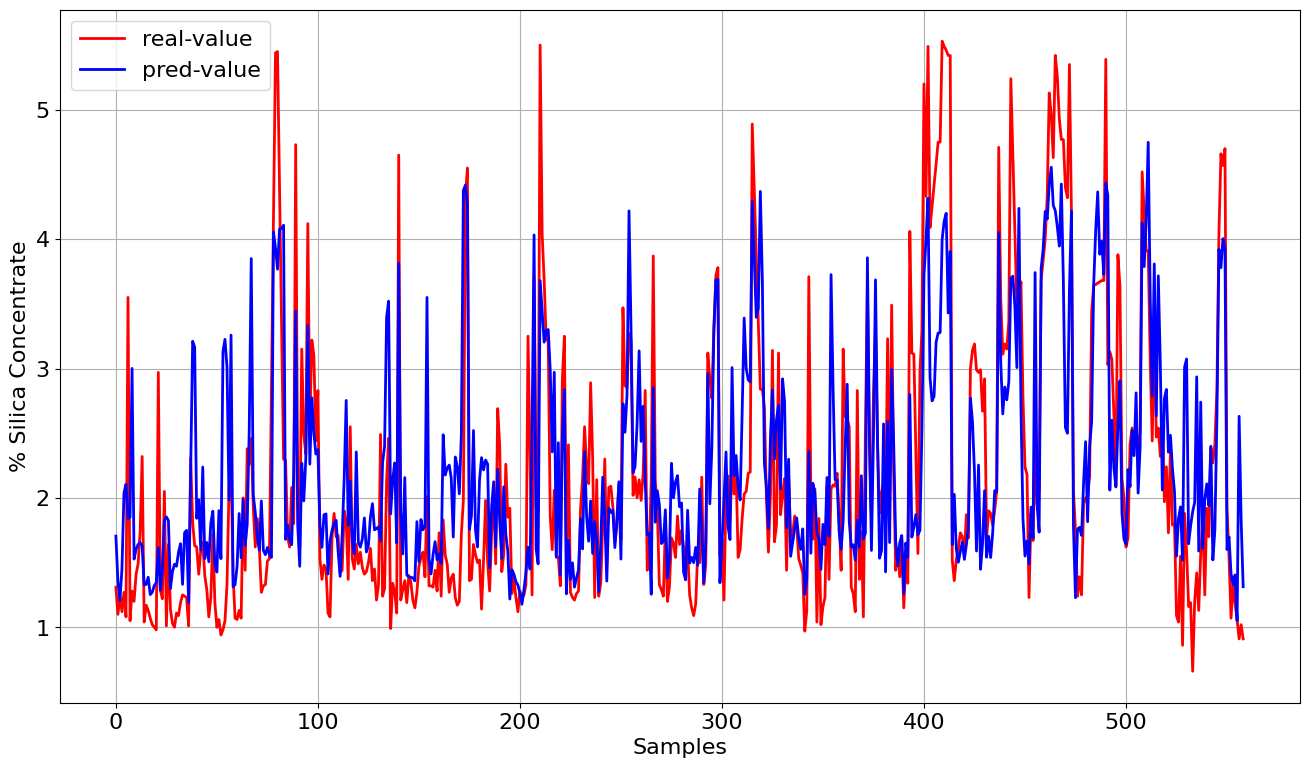

In [50]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

## MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.48287646468072565
MSE =  0.41458916500086773
R2 =  0.6527836912405423


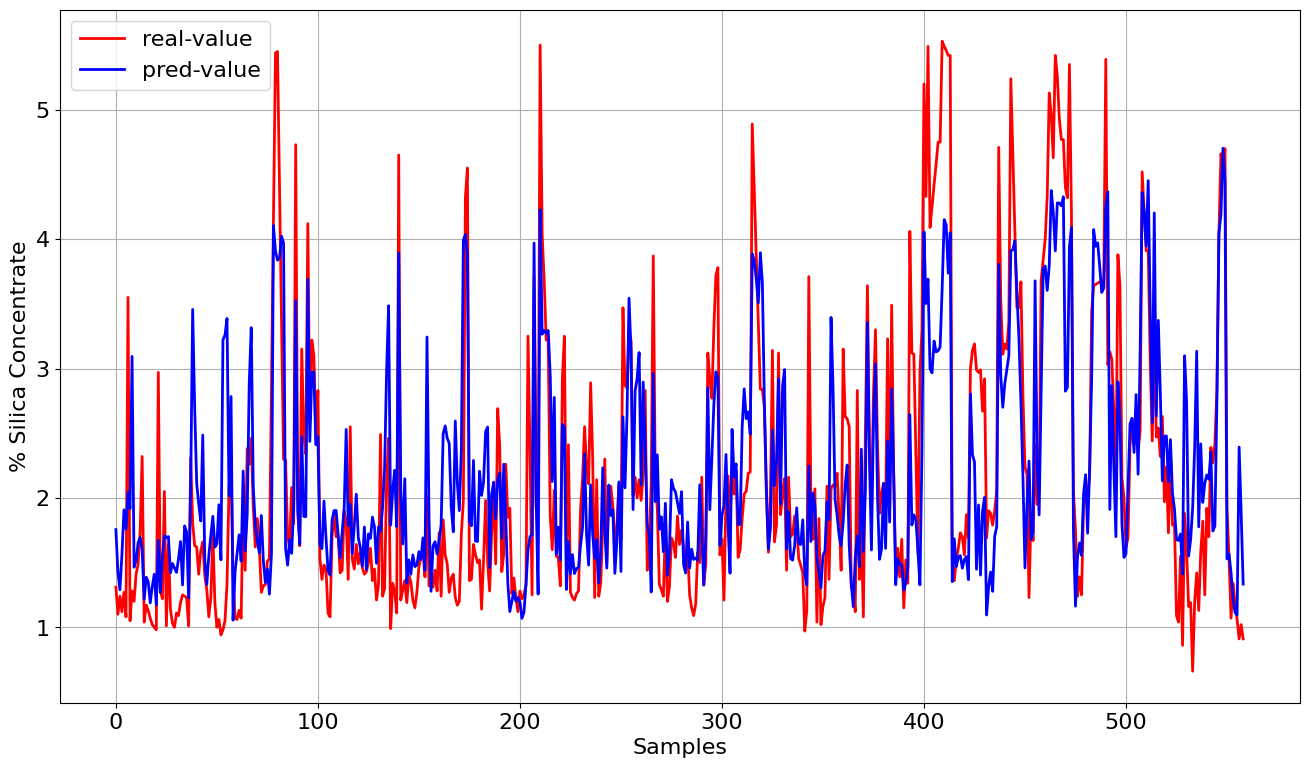

In [51]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

# Resultados


---



## Preparando os Dados

In [52]:
# Combine the dataframes
combined_df = pd.concat([result_minmax_full, result_minmax_agg, result_znorm_full, result_znorm_agg], keys=['MinMaxFull','MinMaxAgg','ZnormFull','ZnormAgg'])

# Reset the index for easier plotting
combined_df = combined_df.reset_index()

# Rename columns for clarity
combined_df.columns = ['Result', 'Index', 'Model', 'MAE', 'MSE', 'R2']


## MAE

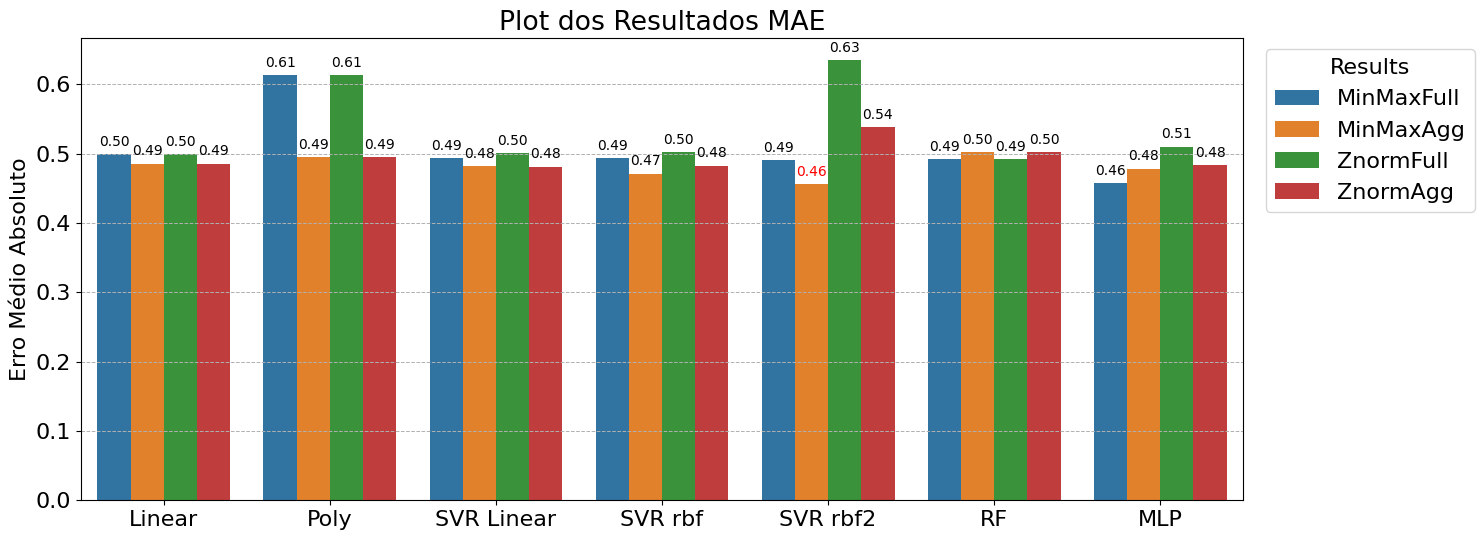

In [56]:
# Melt the dataframe for seaborn
combined_df_melted_mae  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['MAE'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_mae)

plt.title('Plot dos Resultados MAE')
plt.ylabel('Erro Médio Absoluto')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
min = combined_df_melted_mae['value'].min()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == min:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

## MSE

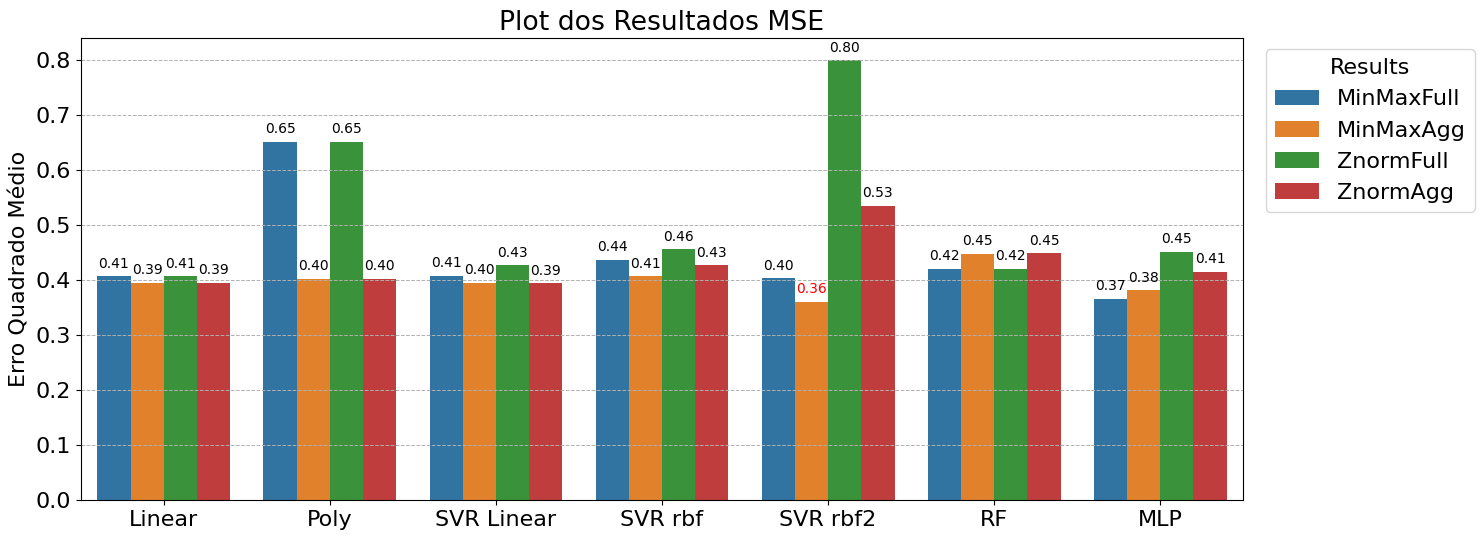

In [57]:
# Melt the dataframe for seaborn
combined_df_melted_mse  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['MSE'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_mse)

plt.title('Plot dos Resultados MSE')
plt.ylabel('Erro Quadrado Médio')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
min = combined_df_melted_mse['value'].min()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == min:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

## R2

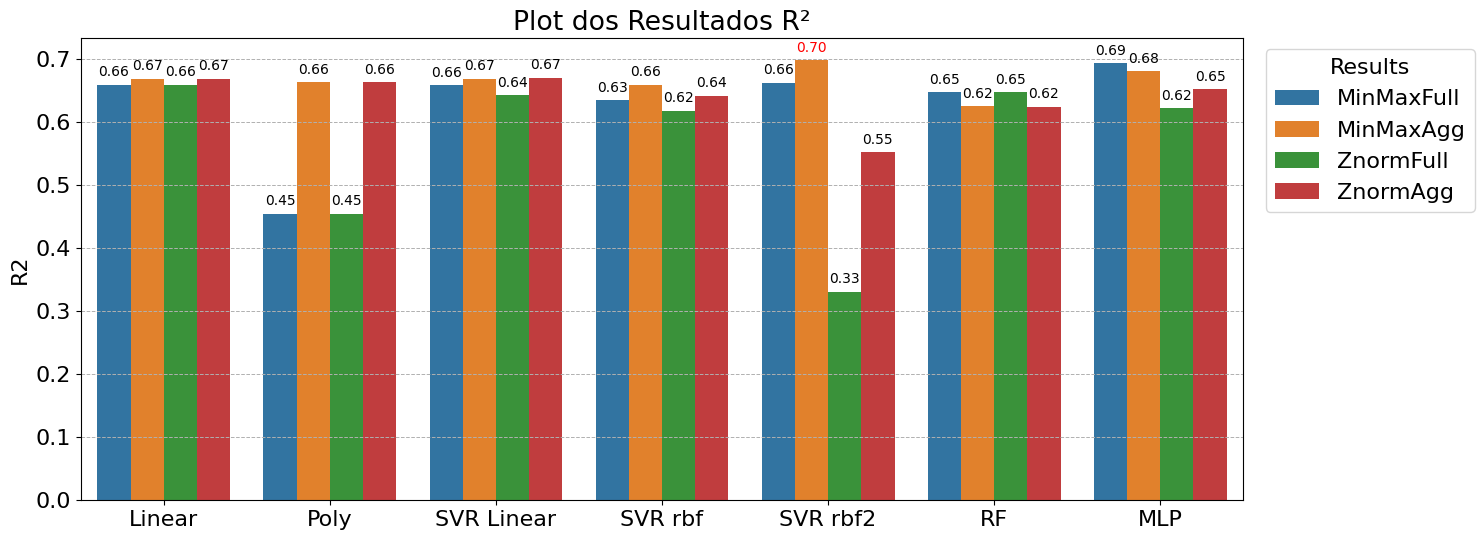

In [58]:
# Melt the dataframe for seaborn
combined_df_melted_r2  = combined_df.melt(id_vars=['Result', 'Model'], value_vars=['R2'])

# Plotting using seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Model', y='value', hue='Result', data=combined_df_melted_r2)

plt.title('Plot dos Resultados R²')
plt.ylabel('R2')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
# Move the legend outside the plot
plt.legend(title='Results', bbox_to_anchor=(1.01, 1), loc='upper left')

# Show the values on top of the bars
max = combined_df_melted_r2['value'].max()
for p in ax.patches:
  if (p.get_height()) > 0.01:
    if p.get_height() == max:
      ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=10, color='red')
    else:
      ax.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 9),
                  textcoords='offset points', fontsize=10, color='black')
plt.show()

# TESTE



---



In [59]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.45541702279925406
MSE =  0.36025369425686676
R2 =  0.6982893705469468


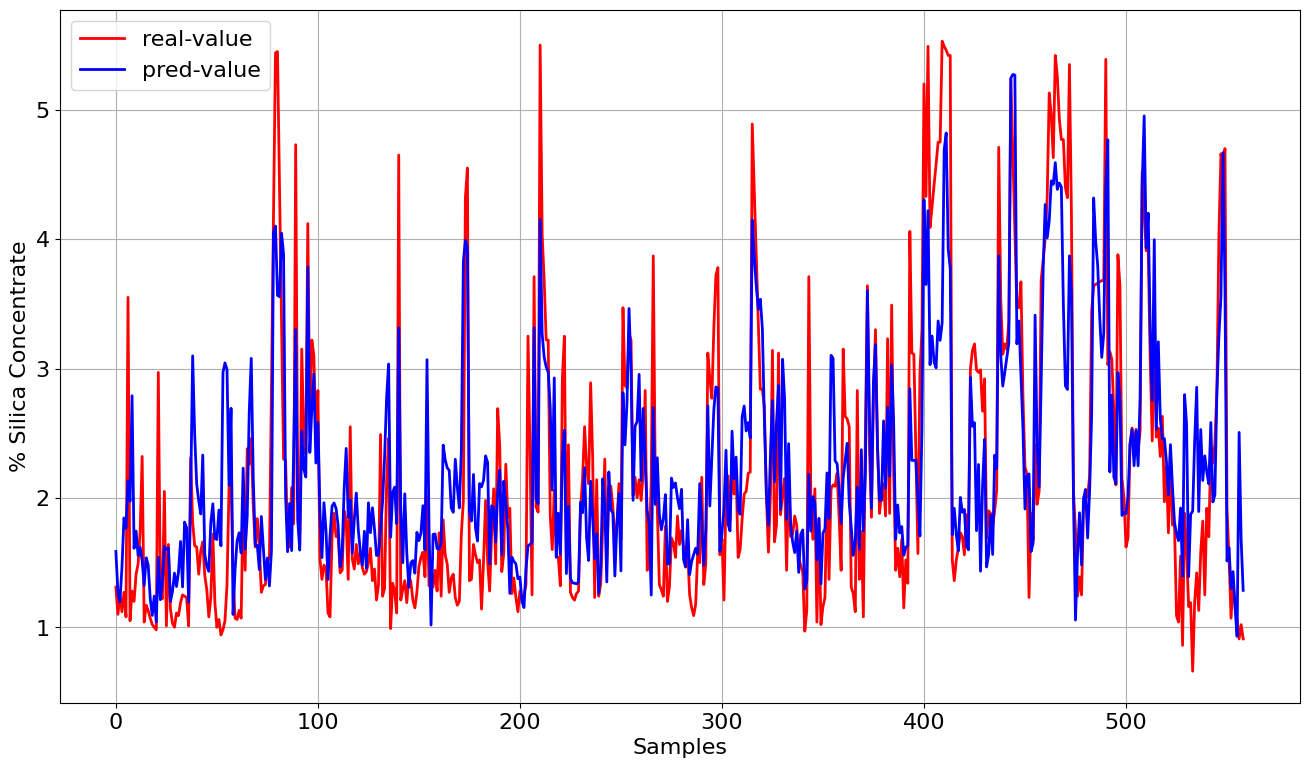

In [60]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MAE =  0.49837420381414493
MSE =  0.40607892989379935
R2 =  0.6965041889596875


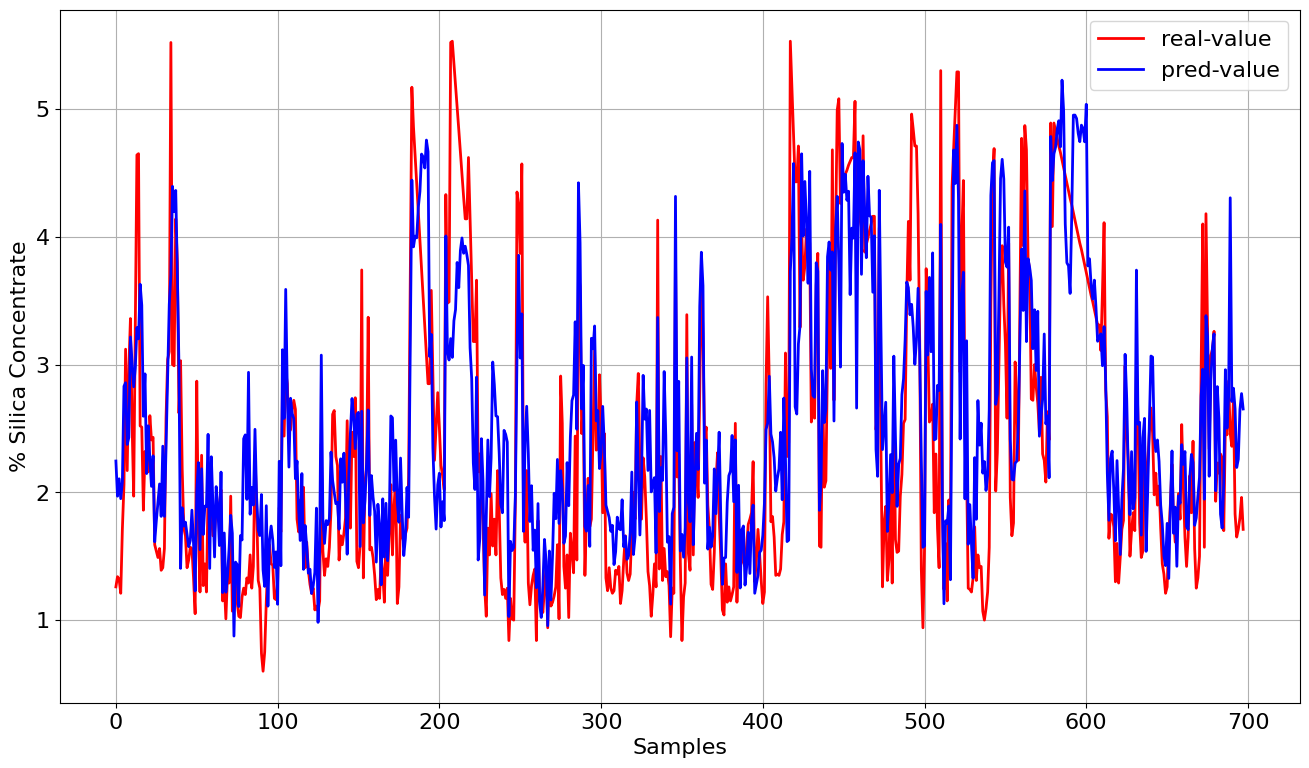

In [61]:
prediction = svr_rbf2.predict(x_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print('TESTE')
print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_test)), y_test,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_test)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()